In [188]:
import lightkurve as lk
from lightkurve import search_lightcurvefile
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.lines as mlines
import read_mist_models
import matplotlib as mpl
import pandas as pd

# uncomment before saving a figure
mpl.rcParams['figure.dpi'] = 1200
# mpl.rcParams('text', usetex = True)
# plt.rc('text', usetex=True)


In [189]:
# load aguirre data

## Kepler Legacy sample stars (putting Papayu in context)
aguirre = np.loadtxt('/Users/vanshree/asterosei/aguirre.txt',skiprows=20)

# #---Details of Columns:
#     KIC              (I8)    Kepler Input Catalog Identifier [ucd=meta.id;meta.main]
#     numax (uHz)      (F6.1)  [884/4198] Frequency of maximum power [ucd=em.freq;src.var]
#     E_numax (uHz)    (F4.1)  Upper confidence interval of numax [ucd=stat.error;stat.max]
#     e_numax (uHz)    (F4.1)  Lower confidence interval of numax [ucd=stat.error]
#     <dnu> (uHz)      (F7.3)  [48.4/173.6] Average large frequency separation [ucd=em.freq;src.var]
#     E_<dnu> (uHz)    (F6.3)  Upper confidence interval of <dnu> [ucd=stat.error;stat.max]
#     e_<dnu> (uHz)    (F6.3)  Lower confidence interval of <dnu> [ucd=stat.error]
#     Teff (K)         (I4)    [5180/6642] Effective temperature [ucd=phys.temperature.effective]
#     e_Teff (K)       (I3)    Uncertainty in Teff [ucd=stat.error;phys.temperature.effective]
#     [Fe/H] ([Sun])   (F5.2)  [-1/0.4] Metallicity [ucd=phys.abund.Z]
#     e_[Fe/H] ([Sun]) (F5.2)  Uncertainty in [Fe/H] [ucd=stat.error;phys.abund.Fe]
#     _RA (deg)        (F9.5)  Right Ascension (J2000) from SIMBAD (not part of the original data) [ucd=pos.eq.ra;meta.main]
#     _DE (deg)        (F9.5)  Declination (J2000) from SIMBAD (not part of the original d

ag_kicid = aguirre[:,0]

ag_numax = aguirre[:,1]
ag_Enumax = aguirre[:,2]
ag_enumax = aguirre[:,3]

ag_dnu = aguirre[:,4]
ag_Ednu = aguirre[:,5]
ag_enu = aguirre[:,6]

ag_teff = aguirre[:,7]
ag_eteff = aguirre[:,8]

ag_feh = aguirre[:,9]
ag_efeh = aguirre[:,10]

ag_ra = aguirre[:,11]
ag_dec = aguirre[:,12]


print(ag_kicid)


[ 1435467.  2837475.  3427720.  3456181.  3632418.  3656476.  3735871.
  4914923.  5184732.  5773345.  5950854.  6106415.  6116048.  6225718.
  6508366.  6603624.  6679371.  6933899.  7103006.  7106245.  7206837.
  7296438.  7510397.  7680114.  7771282.  7871531.  7940546.  7970740.
  8006161.  8150065.  8179536.  8228742.  8379927.  8394589.  8424992.
  8694723.  8760414.  8938364.  9025370.  9098294.  9139151.  9139163.
  9206432.  9353712.  9410862.  9414417.  9812850.  9955598.  9965715.
 10068307. 10079226. 10162436. 10454113. 10516096. 10644253. 10730618.
 10963065. 11081729. 11253226. 11772920. 12009504. 12069127. 12069424.
 12069449. 12258514. 12317678.]


In [190]:
# load aguirre ages

## Kepler Legacy sample AGE stars (putting Papayu in context)
aguirreages = np.loadtxt('/Users/vanshree/asterosei/aguirre_ages_basta.txt',skiprows=38)

# aguirreagesv = np.loadtxt('/Users/vanshree/asterosei/aguirre_ages.txt',skiprows=9)
# agage_vkicid = aguirreagesv[:,0]
# agage_vage = aguirreagesv[:,1]

#---Details of Columns:
#     KIC         (I8)    Kepler Input Catalog Identifier [ucd=meta.id;meta.main]
#     Age (Gyr)   (F7.4)  [0.2/13] Age [ucd=time.age]
#     E_Age (Gyr) (F7.4)  Positive uncertainty in Age [ucd=stat.error;stat.max]
#     e_Age (Gyr) (F7.4)  Negative uncertainty in Age [ucd=stat.error;time.age]

agage_kicid = aguirreages[:,0]

agage_age = aguirreages[:,1]

agage_Eage = aguirreages[:,2]
agage_eage = aguirreages[:,3]



In [191]:
# load aguirre2 data +ages

aguirre2 =  np.loadtxt('/Users/vanshree/asterosei/aguirre_2.txt',skiprows=17)

ag2full_kicid = aguirre2[:,0]

ag2full_age = aguirre2[:,1]

ag2full_Eage = aguirre2[:,2]
ag2full_eage = aguirre2[:,3]

print(ag2full_kicid)


[10666592.  8554498. 11853905.  6521045.  8866102.  3544595. 11904151.
  5866724.  4914423.  8349582.  5094751.  4349452.  8478994. 11295426.
  8292840. 11807274. 10514430.  3425851.  7670943.  8077137. 10586004.
 11133306. 11401755.  4141376.  4143755.  6196457.  9592705.  8494142.
  9414417.  3632418. 10963065.  9955598.  6278762.]


In [192]:
# load mcquillan catalog

#load rotation period data : Table 1 of http://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/ApJS/211/24
mcq = np.loadtxt('/Users/vanshree/asterosei/mcquillan.txt',skiprows=22) #kicids with rot periods 

# Rotation periods of Kepler MS stars (McQuillan+, 2014)
# The rotation period measurements for the 34030 stars presented in this work
# #---Details of Columns:
#     KIC              (I8)    Kepler Input Catalog identifier (Cat. V/133) [ucd=meta.id;meta.main]
#     Teff (K)         (I4)    [3197/6499] Star effective temperature [ucd=phys.temperature.effective]
#     log(g) ([cm/s2]) (F5.2)  [3.5/5.4] Star surface gravity (log) [ucd=phot.sb]
#     Mass (Msun)      (F7.4)  [0.2/1.3] Star mass (1) [ucd=phys.mass]
#     Prot (d)         (F6.3)  [0.2/70]? Rotation period [ucd=time.period]
#     e_Prot (d)       (F6.3)  [0/51]? Error in Prot [ucd=stat.error]
#     Ref              (I1)    ? T_eff_ and log(g) source flag (3) [NULL integer written as an empty string] [ucd=meta.bib]
#     _RA (deg)        (F9.5)  Positions from Kepler Input Catalog (Cat. V/133) (right ascension part) [ucd=pos.eq.ra;meta.main]
#     _DE (deg)        (F9.5)  Positions from Kepler Input Catalog (Cat. V/133) (declination part) [ucd=pos.eq.dec;meta.main]

mcq_kicid = mcq[:,0]

mcq_teff = mcq[:,1]
mcq_logg = mcq[:,2]

mcq_mass = mcq[:,3] #msun

mcq_prot = mcq[:,4] #days ... rotation period
mcq_eprot = mcq[:,5] #days ... err prot

mcq_ref = mcq[:,6] # where did we get teff and log g? see http://vizier.u-strasbg.fr/viz-bin/VizieR?-6N&-out.form=H0&//*&%3C%22Note%22&catid%3D22110024&notid%3D3&-out.emph%3D1

mcq_ra = mcq[:,7]
mcq_dec = mcq[:,8]

# print(len(mcq_kicid)) # equals 34030

# print(np.mean(mcq_prot))
# print(np.mean(mcq_eprot))


papayu_kic = mcq[np.where(mcq_kicid==11029516),0][0][0]
papayu_mcqmass = mcq[np.where(mcq_kicid==11029516),3][0][0]
papayu_prot = mcq[np.where(mcq_kicid==11029516),4][0][0]
papayu_eprot = mcq[np.where(mcq_kicid==11029516),5][0][0]
print(papayu_kic,papayu_prot,papayu_eprot,papayu_mcqmass)


11029516.0 21.139 0.82 1.003


In [193]:
# load jen data 
jendfinit = pd.read_csv('/Users/vanshree/asterosei/jenstars.txt',skiprows=37,header=None,sep='\s+')
# print(jendf)
jeninit = jendfinit.to_numpy()
# print(jen)

#### from Jen's Nature paper -- https://arxiv.org/pdf/1601.02631.pdf
# Col 0: kicid
# 
# Col 1: AMP Mass
# Col 2: AMP eMass
# Col 3: AMP Age
# Col 4: AMP eAge
# Col 5: AMP logg (g/cm^2)
# Col 6: AMP_ZAMS_Teff (K)
# 
# Col 7: BASTA_Mass (Msun)
# Col 8: BASTA_eMass 
# Col 9: BASTA_Age (Gyr)
# Col 10: BASTA_eAge 
# Col 11: BASTA_ZAMS_Teff 
#
# Col 12: Spec_Teff 
# Col 13: Spec_eTeff 
# Col 14: Spec_FeH 
# Col 15: Spec_eFeH 
#
# Col 16: Prot (days)
# Col 17: eProt 
#
# Col 18: Note
####

jen_kicid = jeninit[:,0]

jen_teff = jeninit[:,12] #teff
jen_eteff = jeninit[:,13] #eteff

jen_feh = jeninit[:,14] #feh
jen_efeh = jeninit[:,15] #feh

jen_age = jeninit[:,9] #basta
jen_eage = jeninit[:,10] #e_basta

jen_prot = jeninit[:,16] #days ... rotation period
jen_eprot = jeninit[:,17] #days ... err prot

jen_note = np.array(jeninit[:,18])

print(jen_kicid) 

#both are seismic 
# both ages not avl through aguirre


['16CygA' '16CygB' '3427720' '3656476' '5184732' '6116048' '6196457'
 '6521045' '7680114' '7871531' '8006161' '8349582' '9098294' '9139151'
 '9955598' '10454113' '10586004' '10644253' '10963065' '11244118'
 '11401755']


In [194]:
jen16cyg_age =[]
jen16cyg_eage = []

jen16cyg_feh=[]
jen16cyg_efeh=[]
    
jen16cyg_teff=[]
jen16cyg_eteff=[]

jen16cyg_prot=[]
jen16cyg_eprot=[]


jen_16cyg = ['16CygA','16CygB']
jen_initkic = np.array(['16CygA','16CygB','3427720','3656476','5184732','6116048','6196457','6521045','7680114','7871531','8006161','8349582','9098294','9139151','9955598','10454113','10586004','10644253','10963065','11244118','11401755'])
jen_initkic = jen_kicid
print(jen_initkic)

for kicid in jen_16cyg:
    row_jen = jeninit[np.where(jen_initkic==kicid),:][0][0]
    print(row_jen)
    jen_kicid_16cygi = jeninit[np.where(jen_initkic==kicid),0][0][0]

    jen_teff_16cygi = jeninit[np.where(jen_initkic==kicid),12][0][0] #teff
    
    jen_eteff_16cygi = jeninit[np.where(jen_initkic==kicid),13][0][0] #eteff

    jen_feh_16cygi = jeninit[np.where(jen_initkic==kicid),14][0][0] #feh
    jen_efeh_16cygi = jeninit[np.where(jen_initkic==kicid),15][0][0] 
    jen_age_16cygi = jeninit[np.where(jen_initkic==kicid),9][0][0]  #basta
    jen_eage_16cygi = jeninit[np.where(jen_initkic==kicid),10][0][0] #e_basta

    jen_prot_16cygi = jeninit[np.where(jen_initkic==kicid),16][0][0] 
    jen_eprot_16cygi = jeninit[np.where(jen_initkic==kicid),17][0][0]#days ... err prot
    
#     print(jen_kicid_koii)
#     print(jen_age_koii)
    
    jen16cyg_age.append(jen_age_16cygi)
    jen16cyg_eage.append(jen_eage_16cygi)
    
    jen16cyg_feh.append(jen_feh_16cygi)
    jen16cyg_efeh.append(jen_efeh_16cygi)
    
    jen16cyg_teff.append(jen_teff_16cygi)
    jen16cyg_eteff.append(jen_eteff_16cygi)

    jen16cyg_prot.append(jen_prot_16cygi)
    jen16cyg_eprot.append(jen_eprot_16cygi)
    

print("jen16cyg_age",jen16cyg_age)
print("+/-",jen16cyg_eage)

print("jen_prot = ",jen16cyg_prot)
print("+/-",jen16cyg_eprot)

    

['16CygA' '16CygB' '3427720' '3656476' '5184732' '6116048' '6196457'
 '6521045' '7680114' '7871531' '8006161' '8349582' '9098294' '9139151'
 '9955598' '10454113' '10586004' '10644253' '10963065' '11244118'
 '11401755']
['16CygA' 1.1 0.02 7.07 0.46 4.295 5677 1.04 0.01 6.95 0.26 5668 5825 50
 0.09 0.02 23.8 1.7 'seismic']
['16CygB' 1.06 0.02 6.82 0.28 4.36 5629 0.998 0.005 7.02 0.14 5592 5750 50
 0.05 0.02 23.2 7.4 'seismic']
jen16cyg_age [6.95, 7.02]
+/- [0.26, 0.14]
jen_prot =  [23.8, 23.2]
+/- [1.7, 7.4]


In [195]:
# load jen data AGAIN 
jendf = pd.read_csv('/Users/vanshree/asterosei/jenstars.txt',skiprows=39,header=None,sep='\s+')
# print(jendf)
jen = jendf.to_numpy()
# print(jen)

#### from Jen's Nature paper -- https://arxiv.org/pdf/1601.02631.pdf
# Col 0: kicid
# 
# Col 1: AMP Mass
# Col 2: AMP eMass
# Col 3: AMP Age
# Col 4: AMP eAge
# Col 5: AMP logg (g/cm^2)
# Col 6: AMP_ZAMS_Teff (K)
# 
# Col 7: BASTA_Mass (Msun)
# Col 8: BASTA_eMass 
# Col 9: BASTA_Age (Gyr)
# Col 10: BASTA_eAge 
# Col 11: BASTA_ZAMS_Teff 
#
# Col 12: Spec_Teff 
# Col 13: Spec_eTeff 
# Col 14: Spec_FeH 
# Col 15: Spec_eFeH 
#
# Col 16: Prot (days)
# Col 17: eProt 
#
# Col 18: Note
####

jen_kicid = jen[:,0]

jen_teff = jen[:,12] #teff
jen_eteff = jen[:,13] #eteff

jen_feh = jen[:,14] #feh
jen_efeh = jen[:,15] #feh

jen_age = jen[:,9] #basta
jen_eage = jen[:,10] #e_basta

jen_prot = jen[:,16] #days ... rotation period
jen_eprot = jen[:,17] #days ... err prot

jen_note = np.array(jen[:,18])

print(jen_kicid)


[3427720 3656476 5184732 6116048 6196457 6521045 7680114 7871531 8006161
 8349582 9098294 9139151 9955598 10454113 10586004 10644253 10963065
 11244118 11401755]


In [196]:
## load Ollie data 
# load jen data 
ati = pd.read_csv('/Users/vanshree/asterosei/ollie.csv',skiprows=1,header=None,sep=',')
# print(ati)

# ati = ati[ati.eye_flag != 3]
# ati.drop(ati[ati.KIC == 6603624].index, inplace=True)
# ati.drop(ati[ati.KIC == 8760414].index, inplace=True)
# ati.drop(ati[ati.KIC == 8938364].index, inplace=True)
# print(ati)
# print(jendf)
ollie = ati.to_numpy()
# print(jen)

#### from Ollie's email 
# Col 0: row number
# 
# Col 1: KIC ID
# Col 2: Teff
# Col 3: Age
# Col 4: dnu
# Col 5: eTeff
# Col 6: ednu
# Col 7: efeh
# Col 9: Feh
# Col 10: eAge  (lower age)
# Col 11: EAge (upper age)
#
# Col 54: eProt (low)
# Col 55: Prot
# Col 56: EProt (high)
####

ollie_kicid = ollie[:,1]

ollie_teff = ollie[:,2] #teff
ollie_eteff = ollie[:,5] #eteff

ollie_feh = ollie[:,9] #feh
ollie_efeh = ollie[:,7] #feh

ollie_age = ollie[:,3] #basta
ollie_Eage = ollie[:,19] # E -< pos unc
ollie_eage = ollie[:,10] #e -< neg unc

ollie_dnu = ollie[:,4] #basta
ollie_ednu = ollie[:,6] #basta


ollie_prot = ollie[:,55] #days ... rotation period
ollie_eprot = ollie[:,54] #days ... err prot
ollie_Eprot = ollie[:,56] #days ... err prot

# jen_note = np.array(jen[:,18])

# print(ollie_prot, ollie_eprot, ollie_Eprot)
# print(ollie_kicid)


In [197]:
## jen KOIs 
#The KOI have periods detected via spot modulation6
#7 of which have an AMP ZAMS Teff < 6200 K.

row_jen_koi = jen[np.where(jen_note=='KOI'),:][0]

jen_kicid_koi = jen[np.where(jen_note=='KOI'),0][0]
    
jen_teff_koi = jen[np.where(jen_note=='KOI'),12][0] #teff
jen_eteff_koi = jen[np.where(jen_note=='KOI'),13][0]#eteff

jen_feh_koi = jen[np.where(jen_note=='KOI'),14][0]#feh
jen_efeh_koi = jen[np.where(jen_note=='KOI'),15][0]#feh

jen_age_koi = jen[np.where(jen_note=='KOI'),9][0] #basta
jen_eage_koi = jen[np.where(jen_note=='KOI'),10][0]#e_basta

jen_prot_koi = jen[np.where(jen_note=='KOI'),16][0] #days ... rotation period
jen_eprot_koi = jen[np.where(jen_note=='KOI'),17][0]#days ... err prot

# print(row_jen_koi)
# print(jen_kicid_koi)

jen_kicid_koi=np.array(jen_kicid_koi).astype(int) 
print(jen_kicid_koi)

# print(jenprot_koi)



[ 6196457  6521045  8349582  9955598 10586004 10963065 11401755]


In [198]:
## jen seismic  
# Periods detected via spot modulation6
#7 of which have an AMP ZAMS Teff < 6200 K.

row_jen_seismic = jen[np.where(jen_note=='seismic'),:][0]

jen_kicid_seismic = jen[np.where(jen_note=='seismic'),0][0]
    
jen_teff_seismic = jen[np.where(jen_note=='seismic'),12][0] #teff
jen_eteff_seismic = jen[np.where(jen_note=='seismic'),13][0]#eteff

jen_feh_seismic = jen[np.where(jen_note=='seismic'),14][0]#feh
jen_efeh_seismic = jen[np.where(jen_note=='seismic'),15][0]#feh

jen_age_seismic = jen[np.where(jen_note=='seismic'),9][0] #basta
jen_eage_seismic = jen[np.where(jen_note=='seismic'),10][0]#e_basta

jen_prot_seismic = jen[np.where(jen_note=='seismic'),16][0] #days ... rotation period
jen_eprot_seismic = jen[np.where(jen_note=='seismic'),17][0]#days ... err prot

# print(row_jen_koi)
print(jen_kicid_seismic)

# print(jenprot_koi)


[3427720 3656476 5184732 6116048 7680114 7871531 8006161 9098294 9139151
 10454113 10644253 11244118]


In [199]:
### selecting sample test.. 
kag2=[]
am = [1,2,3,4,5,6,7,8,9]
ba = [1,4,8]
for i in range(0,len(ba)):
    for j in range(0,len(am)):
        kam = np.where(ba[i]==am[j],ba[i],0)
#         kam = np.where(ba[i]==am[j],ba[i],0)
#         print(kam)
        if (kam==0): # selecting *s that have a rotation period 
            continue
        print(kam)

        kag2.append(kam)
kag2_kicid = np.array(kag2).astype(int)
print(kag2_kicid)



1
4
8
[1 4 8]


In [200]:
# np.intersect1d(ba, am)

In [201]:
###### just checking 16Cyg in Aguirre 1&2 & mcq
kag2=[]
ba=mcq_kicid
for i in range(0,len(ba)):
    kam = np.where(ba[i]=='16CygA',ba[i],0)
#         print(kam)
    if (kam==0): # selecting *s that have a rotation period 
        continue
    print(kam)
    kag2.append(kam)
kag2_kicid = np.array(kag2).astype(str)
print(kag2_kicid)
print(len(kag2_kicid))

##### verifying it is not present.. so they are only in jen's sample
    

[]
0


In [202]:
# select mcqag sample 
# print(jen_kicid)
# print(jen_kicid[2:])
# oli_kicid = np.array([3425851,3544595,4141376,4143755,4349452,4914423,5094751,5866724,6196457,6278762,6521045,7670943,8077137,8292840,8349582,8478994,8494142,8554498,8866102,9592705,10514430,10586004,10666592,11133306,11295426,11401755,11807274,11853905,11904151])
# print(ollie_kicid)
# print(len(ollie_kicid))
aa = [3425851,3544595,4141376,4143755,4349452,4914423,5094751,5866724,6196457,6278762,6521045,7670943,8077137,8292840,8349582,8478994,8494142,8554498,8866102,9592705,10514430,10586004,10666592,11133306,11295426,11401755,11807274,11853905,11904151]
bb = [10666592,8554498,11853905,6521045,8866102,3544595,11904151,5866724,4914423,8349582,5094751,4349452,8478994,11295426,8292840,11807274,10514430,3425851,7670943,8077137,10586004,11133306,11401755,4141376,4143755,6196457,9592705,8494142,6278762]
print(ag2full_kicid)
# jen_kicidx=np.array(jen_kicid[2:]).astype(int) #ignoring 16CygA & B and converting to Ints
# jen_kicidx_seismic=np.array(jen_kicid_seismic[2:]).astype(int) #ignoring 16CygA & B and converting to Ints
# print(jen_kicid_seismic)
# print(jen_kicidx_seismic)
# am = np.array([7871531,9098294,10454113])
kag2=[]
am = ag2full_kicid
ba = bb#jen_kicid_koi #ag2full_kicid
for i in range(0,len(ba)):
    for j in range(0,len(am)):
        kam = np.where(am[j]==ba[i],am[j],0)
#         print(kam)
        if (kam==0): # selecting *s that have a rotation period 
            continue
#         print(kam)
        kag2.append(kam)
kag2_kicid = np.array(kag2).astype(int)
print(kag2_kicid)
print(len(kag2_kicid))

[10666592.  8554498. 11853905.  6521045.  8866102.  3544595. 11904151.
  5866724.  4914423.  8349582.  5094751.  4349452.  8478994. 11295426.
  8292840. 11807274. 10514430.  3425851.  7670943.  8077137. 10586004.
 11133306. 11401755.  4141376.  4143755.  6196457.  9592705.  8494142.
  9414417.  3632418. 10963065.  9955598.  6278762.]
[10666592  8554498 11853905  6521045  8866102  3544595 11904151  5866724
  4914423  8349582  5094751  4349452  8478994 11295426  8292840 11807274
 10514430  3425851  7670943  8077137 10586004 11133306 11401755  4141376
  4143755  6196457  9592705  8494142  6278762]
29


In [203]:
## outputs 
# kicids in common

# Mcquillan-Aguirre 
#  [ 7103006  7206837  7771282  7871531  8379927  9098294 10079226 10162436
#  10454113 12009504]


# Mcquillan-Aguirre2 
# 0000 aka None 

# Aguirre-Aguirre2 
#  [ 3632418  9414417  9955598 10963065]



# ( full Jen KOI == [ 6196457  6521045  8349582  9955598 10586004 10963065 11401755])

# Jen KOI - Aguirre  
# [ 9955598 10963065]

# Jen KOI - Aguirre2 
# [ 6196457  6521045  8349582  9955598 10586004 10963065 11401755]


## Mcq Jen (Also mcqagjen)
# [ 7871531  9098294 10454113]

##MAJ 
# [ 7871531  9098294 10454113]


# ( full Jen Seis == ['16CygA' '16CygB' '3427720' '3656476' '5184732' '6116048' '7680114'
# '7871531' '8006161' '9098294' '9139151' '10454113' '10644253' '11244118']

# Jen seismic - Aguirre
# [ 3427720  3656476  5184732  6116048  7680114  7871531  8006161  9098294
#   9139151 10454113 10644253]

# Jen seismic - Aguirre2 
# 0000 aka None

#### ages from Jen's --> 16 Cyg A & B && 11244118


## 
# Jen-Aguirre
# [ 3427720  3656476  5184732  6116048  7680114  7871531  8006161  9098294
#   9139151  9955598 10454113 10644253 10963065]

# Jen-Aguirre2
# [ 6196457  6521045  8349582  9955598 10586004 10963065 11401755]




##### 
# Ollie-Aguirre 
# [ 1435467  2837475  3427720  3456181  3632418  3656476  3735871  4914923
#   5184732  5773345  5950854  6106415  6116048  6225718  6508366  6603624
#   6679371  6933899  7103006  7106245  7206837  7296438  7510397  7680114
#   7771282  7871531  7940546  7970740  8006161  8150065  8179536  8228742
#   8379927  8394589  8424992  8694723  8760414  8938364  9025370  9098294
#   9139151  9139163  9206432  9353712  9410862  9414417  9812850  9955598
#   9965715 10068307 10079226 10162436 10454113 10516096 10644253 10730618
#  10963065 11081729 11253226 11772920 12009504 12069127 12069424 12069449
#  12258514 12317678]

# oli-Mcq = none

## ollie Ag2 common
# [10666592  8554498 11853905  6521045  8866102  3544595 11904151  5866724
#   4914423  8349582  5094751  4349452  8478994 11295426  8292840 11807274
#  10514430  3425851  7670943  8077137 10586004 11133306 11401755  4141376
#   4143755  6196457  9592705  8494142  6278762]

# oliag2_kicid = np.array([3425851,3544595,4141376,4143755,4349452,4914423,5094751,5866724,6196457,6278762,6521045,7670943,8077137,8292840,8349582,8478994,8494142,8554498,8866102,9592705,10514430,10586004,10666592,11133306,11295426,11401755,11807274,11853905,11904151])

### oli X jen 
# [ 6196457  6521045  8349582 10586004 11401755]
# all koi's 
# (remove these)
# <-- these are the only rotation samples in Aguirre 2. Ollie's sample will add to that. 

# oli (ag) new pts 
# [ 1435467  2837475   3456181  3632418   3735871  4914923
#    5773345  5950854  6106415    6225718  6508366  6603624
#   6679371  6933899   7106245   7296438  7510397  
#     7940546  7970740   8150065  8179536  8228742
#    8394589  8424992  8694723  8760414  8938364  9025370  
#    9139163  9206432  9353712  9410862  9414417  9812850  
#   9965715 10068307 10516096 10730618
#  11081729 11253226 11772920 12069127 12069424 12069449
#  12258514 12317678]


# oli (ag2) new pts 
# [ 3425851  3544595  4141376  4143755  4349452  4914423  5094751  5866724
#     6278762    7670943  8077137  8292840    8478994
#   8494142  8554498  8866102  9592705 10514430  10666592 11133306
#  11295426  11807274 11853905 11904151]

In [204]:
mcqag_kicid = np.array([7103006,7206837,7771282,7871531,8379927,9098294,10079226,10162436,10454113,12009504])
# mcqag2_kicid = np.array([])
mcqjen_kicid = np.array([7871531,9098294,10454113])

agag2_kicid = np.array([3632418,9414417,9955598,10963065])

jenkoiag_kicid = np.array([9955598,10963065])
jenkoiag2_kicid = np.array([6196457,6521045,8349582,9955598,10586004,10963065,11401755])

jenseismicag_kicid = np.array([3427720,3656476,5184732,6116048,7680114,7871531,8006161,9098294,9139151,10454113,10644253])
# jenseismicag2_kicid = np.array([])

jenag_kicid = np.array([3427720,3656476,5184732,6116048,7680114,7871531,8006161,9098294,9139151,9955598,10454113,10644253,10963065])
jenag2_kicid = np.array([6196457,6521045,8349582,9955598,10586004,10963065,11401755])

ollieag2_kicid = np.array([3425851,3544595,4141376,4143755,4349452,4914423,5094751,5866724,6278762,7670943,807713,8292840,8478994,8494142,8554498,8866102,9592705,10514430,10666592,11133306,11295426,11807274,11853905,11904151])
#all of aguirre 2 minus any in ag2 and any measured by jen

In [205]:
# mcqag_kicid = np.array([7103006,7206837,7771282,7871531,8379927,9098294,10079226,10162436,10454113,12009504])

# need to remove # [ 7871531  9098294 10454113] coz its included in jen's sample
mcqag_kicid = np.array([7103006,7206837,7771282,8379927,10079226,10162436,12009504])


# logg and teff at mcqag ? 
mcqag_teff =[]
mcqag_dnu =[]
mcqag_prot=[]
mcqag_eprot=[]
mcqag_numax =[]
mcqagage_age=[]
mcqagage_Eage=[]
mcqagage_eage=[]
mcqag_mass=[]
mcqag_feh=[]
mcqag_efeh=[]

for kicid in mcqag_kicid:
    #mcquillan
    row_mcq = mcq[np.where(mcq_kicid==kicid),:][0]
#     print("row_mcq",row_mcq)

    mcqkicidi = mcq[np.where(mcq_kicid==kicid),0][0][0]
    
    mcqteffi = mcq[np.where(mcq_kicid==kicid),1][0][0]
    mcqloggi = mcq[np.where(mcq_kicid==kicid),2][0][0]
    
    mcqmassi = mcq[np.where(mcq_kicid==kicid),3][0][0] #msun
    
    mcqproti = mcq[np.where(mcq_kicid==kicid),4][0][0] #days
    mcqeproti = mcq[np.where(mcq_kicid==kicid),5][0][0] #days.. #err
    
    mcqrefi = mcq[np.where(mcq_kicid==kicid),6][0][0]
    mcqrai = mcq[np.where(mcq_kicid==kicid),7][0][0]
    mcqdeci = mcq[np.where(mcq_kicid==kicid),8][0][0]
#     mcqdnui = mcq_dnu[np.where(mcq_kicid==kicid),9][0][0]
    
    
#     print("kicid",kicid)
#     print("mcquillan_teff",int(mcqteffi), "K")
# #     print(mcqkicidi)
    
#         print('kicid = ',kicid)
#     print(" row for kicid =  7103006 6203  4.26  1.1716  4.733  0.059 0 286.73315 +42.67202")
    
    
    #aguirre
    row_ag = aguirre[np.where(ag_kicid==kicid),:]
#     print("row_ag",row_ag) 

    agkicidi = aguirre[np.where(ag_kicid==kicid),0][0][0]
    
    agnumaxi = aguirre[np.where(ag_kicid==kicid),1][0][0]
    agEnumaxi = aguirre[np.where(ag_kicid==kicid),2][0][0]
    agenumaxi = aguirre[np.where(ag_kicid==kicid),3][0][0]

    agdnui = aguirre[np.where(ag_kicid==kicid),4][0][0]
    agEdnui = aguirre[np.where(ag_kicid==kicid),5][0][0]
    agednui = aguirre[np.where(ag_kicid==kicid),6][0][0]

    agteffi = aguirre[np.where(ag_kicid==kicid),7][0][0]
    ageteffi = aguirre[np.where(ag_kicid==kicid),8][0][0]

    agfehi = aguirre[np.where(ag_kicid==kicid),9][0][0]
    agefehi = aguirre[np.where(ag_kicid==kicid),10][0][0]

    agrai = aguirre[np.where(ag_kicid==kicid),11][0][0]
    agdeci = aguirre[np.where(ag_kicid==kicid),12][0][0]
    
    # aguirre ages 
    row_agage = aguirreages[np.where(agage_kicid==kicid),:]
    
    agagekicidi = aguirreages[np.where(agage_kicid==kicid),0][0][0]

    agageagei = aguirreages[np.where(agage_kicid==kicid),1][0][0]
    agageEagei = aguirreages[np.where(agage_kicid==kicid),2][0][0]
    agageeagei = aguirreages[np.where(agage_kicid==kicid),3][0][0]

    
#     print("aguirre_teff",int(agteffi),"+/-",ageteffi, "K")
#     print("mcquillan-aguirre teff",int(agteffi-mcqteffi), "K")
# #     print("delta nu mcq",mcqdnui,"microHz")
#     print("delta nu aguirre",agdnui,"(+",agEdnui,"/-",agednui,") microHz")
#     print("rot period(mcq)",mcqproti,"+/-",mcqeproti,"days")
#     print("\n")
        
    mcqag_teff.append(agteffi)
    mcqag_dnu.append(agdnui)
    
    mcqag_prot.append(mcqproti)
    mcqag_eprot.append(mcqeproti)
    
    mcqag_numax.append(agnumaxi)
    
    mcqagage_age.append(agageagei)
    mcqagage_Eage.append(agageEagei)
    mcqagage_eage.append(agageeagei)
    
    mcqag_mass.append(mcqmassi)
    
    mcqag_feh.append(agfehi)
    mcqag_efeh.append(agefehi)

        
# print("mcqag_kicid",mcqag_kicid)

# print("mcqag_teff",mcqag_teff)
# print("mcqag_dnu",mcqag_dnu)

# print("mcqag_prot",mcqag_prot)
# print("mcqag_eprot",mcqag_eprot)

# print("mcqag_age",mcqagage_age)
# print("mcqag_Eage",mcqagage_Eage)
# print("mcqag_eage",mcqagage_eage)

# print("mcqag_feh",mcqag_feh)
# print("mcqag_efeh",mcqag_efeh)

In [206]:
agag2_kicid = np.array([3632418,9414417,9955598,10963065])

agag2_age_ag=[]
agag2_Eage_ag=[]
agag2_eage_ag=[]

agag2_age_ag2=[]
agag2_Eage_ag2=[]
agag2_eage_ag2=[]

for kicid in agag2_kicid:
    
    # aguirre ages 
    row_agage = aguirreages[np.where(agage_kicid==kicid),:]
    
    agagekicidi = aguirreages[np.where(agage_kicid==kicid),0][0][0]

    agageagei = aguirreages[np.where(agage_kicid==kicid),1][0][0]
    agageEagei = aguirreages[np.where(agage_kicid==kicid),2][0][0]
    agageeagei = aguirreages[np.where(agage_kicid==kicid),3][0][0]
    
    #### aguirre2 ages 
    row_agage2 = aguirre2[np.where(ag2full_kicid==kicid),:]
    
#     print(row_agage)
#     print(row_agage2)
    
    agagekicidi2 = aguirre2[np.where(ag2full_kicid==kicid),0][0][0]

    agageagei2 = aguirre2[np.where(ag2full_kicid==kicid),1][0][0]
    agageEagei2 = aguirre2[np.where(ag2full_kicid==kicid),2][0][0]
    agageeagei2 = aguirre2[np.where(ag2full_kicid==kicid),3][0][0]
    
    
    agag2_age_ag.append(agageagei)
    agag2_Eage_ag.append(agageEagei)
    agag2_eage_ag.append(agageeagei)
    agag2_age_ag2.append(agageagei2)
    agag2_Eage_ag2.append(agageEagei2)
    agag2_eage_ag2.append(agageeagei2)

print("kicid",agag2_kicid)

print("ag_age",agag2_age_ag)
print("+",agag2_Eage_ag)
print("-",agag2_eage_ag)

print("ag2_age",agag2_age_ag2)
print("+",agag2_Eage_ag2)
print("-",agag2_eage_ag2)

print("conclusion -- use aguirre ages ")

kicid [ 3632418  9414417  9955598 10963065]
ag_age [2.6331, 2.6491, 6.2902, 7.1526]
+ [0.1757, 0.1597, 1.9483, 1.9164]
- [0.1757, 0.1757, 1.8365, 1.613]
ag2_age [2.6, 2.65, 6.98, 4.18]
+ [0.16, 0.14, 0.4, 0.53]
- [0.16, 0.16, 0.5, 0.35]
conclusion -- use aguirre ages 


In [207]:
jenkoiag_kicid = np.array([9955598,10963065]) ## remove these 2 from the next array
# jenkoiag2_kicid = np.array([6196457,6521045,8349582,10586004,11401755]) ## this is all of the koisS
jenkoiag2_kicid = np.array([6196457,6521045,8349582,9955598,10586004,10963065,11401755]) ## this is all of the koisS
jen_kicidx= np.array([3427720,3656476,5184732,6116048,6196457,6521045,7680114,7871531,8006161,8349582,9098294,9139151,9955598,10454113,10586004,10644253,10963065,11244118,11401755])
# print(jen_kicidx)
# jen_kicids = np.array([3427720,3656476,5184732,6116048,6196457,6521045,7680114,7871531,8006161,8349582,9098294,9139151,9955598,10454113,10586004,10644253,10963065,11244118,11401755])

print("jenkoiag2_kicid",jenkoiag2_kicid)

# print("jen_kicid",jen_kicid)
# print("jen_prot",jen_prot)

# Since aguirre ages are more precise
jenkoi_ag_age =[]
jenkoi_ag_Eage =[]
jenkoi_ag_eage =[]

jenkoi_ag2_age =[]
jenkoi_ag2_Eage =[]
jenkoi_ag2_eage =[]

jenkoi_ag2_feh =[]
jenkoi_ag2_efeh =[]
jenkoi_ag2_teff=[]
jenkoi_ag2_eteff=[]
jenkoi_ag2_prot=[]
jenkoi_ag2_eprot=[]

for kicid in jenkoiag2_kicid:
#     print(kicid)
    #### aguirre2 ages 
    row_agage2 = aguirre2[np.where(ag2full_kicid==kicid),:]
    
    agagekicidi2 = aguirre2[np.where(ag2full_kicid==kicid),0][0][0]

    agageagei2 = aguirre2[np.where(ag2full_kicid==kicid),1][0][0]
    agageEagei2 = aguirre2[np.where(ag2full_kicid==kicid),2][0][0]
    agageeagei2 = aguirre2[np.where(ag2full_kicid==kicid),3][0][0]
    
#         ##### jen roation periods
#     jenprot_maj = jen[np.where(jen_kicids.astype('float64')==kicid),16][0][0] #days ... rotation period
#     jeneprot_maj = jen[np.where(jen_kicids.astype('float64')==kicid),17][0][0] #days ... err prot
#     jen_notei = jen[np.where(jen_kicids.astype('float64')==kicid),18][0][0]
#     print(jenprot_maj)

    row_jen_koii = jen[np.where(jen_kicidx==kicid),:][0][0]
    jen_kicid_koii = jen[np.where(jen_kicidx==kicid),0][0][0]

    jen_teff_koii = jen[np.where(jen_kicidx==kicid),12][0][0] #teff
    
    jen_eteff_koii = jen[np.where(jen_kicidx==kicid),13][0][0] #eteff

    jen_feh_koii = jen[np.where(jen_kicidx==kicid),14][0][0] #feh
    jen_efeh_koii = jen[np.where(jen_kicidx==kicid),15][0][0] 
    jen_age_koii = jen[np.where(jen_kicidx==kicid),9][0][0]  #basta
    jen_eage_koii = jen[np.where(jen_kicidx==kicid),10][0][0] #e_basta

    jen_prot_koii = jen[np.where(jen_kicidx==kicid),16][0][0] 
    jen_eprot_koii = jen[np.where(jen_kicidx==kicid),17][0][0]#days ... err prot
    
#     print(jen_kicid_koii)
#     print(jen_age_koii)
    
    jenkoi_ag2_age.append(agageagei2)
    jenkoi_ag2_Eage.append(agageEagei2)
    jenkoi_ag2_eage.append(agageeagei2)
    
    jenkoi_ag2_feh.append(jen_feh_koii)
    jenkoi_ag2_efeh.append(jen_efeh_koii)
    
    jenkoi_ag2_teff.append(jen_teff_koii)
    jenkoi_ag2_eteff.append(jen_teff_koii)

    jenkoi_ag2_prot.append(jen_prot_koii)
    jenkoi_ag2_eprot.append(jen_eprot_koii)
    

print("jenag2_age",jenkoi_ag2_age)
print("+",jenkoi_ag2_Eage)
print("-",jenkoi_ag2_eage)

print("jen_prot = ",jenkoi_ag2_prot)
print("+/-",jenkoi_ag2_eprot)

# print("jenag2_prot",jenkoi_ag2_prot)
# print("+/-",jenkoi_ag2_eprot)

# ## ## ## ## ## ## 
for kicid in jenkoiag_kicid:
#     print(kicid)
    # aguirre ages 
    row_agage = aguirreages[np.where(agage_kicid==kicid),:]
    print(row_agage)
    agagekicidi = aguirreages[np.where(agage_kicid==kicid),0][0][0]

    agageagei = aguirreages[np.where(agage_kicid==kicid),1][0][0]
    agageEagei = aguirreages[np.where(agage_kicid==kicid),2][0][0]
    agageeagei = aguirreages[np.where(agage_kicid==kicid),3][0][0]
    
    
    jenkoi_ag_age.append(agageagei)
    jenkoi_ag_Eage.append(agageEagei)
    jenkoi_ag_eage.append(agageeagei)

print("ag_age",jenkoi_ag_age)
print("+",jenkoi_ag_Eage)
print("-",jenkoi_ag_eage)

# jenkoi_age = np.concatenate([])
# jenkoi_Eage = []
# jenkoi_eage = []

# note huge diff for age of 10586004

jenkoiag2_kicid [ 6196457  6521045  8349582  9955598 10586004 10963065 11401755]
jenag2_age [5.52, 6.5, 8.03, 6.98, 6.43, 4.18, 7.1]
+ [0.51, 0.46, 0.8, 0.4, 0.64, 0.53, 0.61]
- [0.48, 0.56, 0.7, 0.5, 0.61, 0.35, 0.59]
jen_prot =  [16.4, 25.3, 51.0, 34.7, 29.8, 12.4, 17.2]
+/- [1.2, 2.8, 1.5, 6.3, 1.0, 1.2, 1.4]
[[[9.955598e+06 6.290200e+00 1.948300e+00 1.836500e+00]]]
[[[1.0963065e+07 7.1526000e+00 1.9164000e+00 1.6130000e+00]]]
ag_age [6.2902, 7.1526]
+ [1.9483, 1.9164]
- [1.8365, 1.613]


In [208]:
jenseismicag_kicid = np.array([3427720,3656476,5184732,6116048,7680114,7871531,8006161,9098294,9139151,10454113,10644253])
jen_kicidx= np.array([3427720,3656476,5184732,6116048,6196457,6521045,7680114,7871531,8006161,8349582,9098294,9139151,9955598,10454113,10586004,10644253,10963065,11244118,11401755])
# print(jen_kicidx)
# jen_kicids = np.array([3427720,3656476,5184732,6116048,6196457,6521045,7680114,7871531,8006161,8349582,9098294,9139151,9955598,10454113,10586004,10644253,10963065,11244118,11401755])

print("jenseismicag_kicid",jenseismicag_kicid)

# print("jen_kicid",jen_kicid)
# print("jen_prot",jen_prot)

# Since aguirre ages are more precise
jenseismic_ag_age =[]
jenseismic_ag_Eage =[]
jenseismic_ag_eage =[]

jenseismic_ag_feh =[]
jenseismic_ag_efeh =[]
jenseismic_ag_teff=[]
jenseismic_ag_eteff=[]
jenseismic_ag_prot=[]
jenseismic_ag_eprot=[]

for kicid in jenseismicag_kicid:
#     print(kicid)
 #     # aguirre ages 
    row_agage = aguirreages[np.where(agage_kicid==kicid),:]
    
    agagekicidi = aguirreages[np.where(agage_kicid==kicid),0][0][0]

    agageagei = aguirreages[np.where(agage_kicid==kicid),1][0][0]
    agageEagei = aguirreages[np.where(agage_kicid==kicid),2][0][0]
    agageeagei = aguirreages[np.where(agage_kicid==kicid),3][0][0]


#         ##### jen roation periods
#     jenprot_maj = jen[np.where(jen_kicids.astype('float64')==kicid),16][0][0] #days ... rotation period
#     jeneprot_maj = jen[np.where(jen_kicids.astype('float64')==kicid),17][0][0] #days ... err prot
#     jen_notei = jen[np.where(jen_kicids.astype('float64')==kicid),18][0][0]
#     print(jenprot_maj)

    row_jen_seismici = jen[np.where(jen_kicidx==kicid),:][0][0]
    jen_kicid_seismici = jen[np.where(jen_kicidx==kicid),0][0][0]

    jen_teff_seismici = jen[np.where(jen_kicidx==kicid),12][0][0] #teff
    
    jen_eteff_seismici = jen[np.where(jen_kicidx==kicid),13][0][0] #eteff

    jen_feh_seismici = jen[np.where(jen_kicidx==kicid),14][0][0] #feh
    jen_efeh_seismici = jen[np.where(jen_kicidx==kicid),15][0][0] 
    jen_age_seismici = jen[np.where(jen_kicidx==kicid),9][0][0]  #basta
    jen_eage_seismici = jen[np.where(jen_kicidx==kicid),10][0][0] #e_basta

    jen_prot_seismici = jen[np.where(jen_kicidx==kicid),16][0][0] 
    jen_eprot_seismici = jen[np.where(jen_kicidx==kicid),17][0][0]#days ... err prot
    
#     print(jen_kicid_koii)
#     print(jen_age_koii)
    
    jenseismic_ag_age.append(agageagei)
    jenseismic_ag_Eage.append(agageEagei)
    jenseismic_ag_eage.append(agageeagei)
    
    jenseismic_ag_feh.append(jen_feh_seismici)
    jenseismic_ag_efeh.append(jen_efeh_seismici)
    
    jenseismic_ag_teff.append(jen_teff_seismici)
    jenseismic_ag_eteff.append(jen_teff_seismici)

    jenseismic_ag_prot.append(jen_prot_seismici)
    jenseismic_ag_eprot.append(jen_eprot_seismici)
    

# print("jenag2_age",jenseismic_ag_age)
# print("+",jenseismic_ag_Eage)
# print("-",jenseismic_ag_eage)

# print("jen_prot = ",jenseismic_ag_prot)
# print("+/-",jenseismic_ag_eprot)

jenseismicag_kicid [ 3427720  3656476  5184732  6116048  7680114  7871531  8006161  9098294
  9139151 10454113 10644253]


In [209]:
# # 
print("jen16cyg_age",jen16cyg_age)
print("+/-",jen16cyg_eage)

print("jen_prot = ",jen16cyg_prot)
print("+/-",jen16cyg_eprot)
#

# jenlast_age =[]
# jenlast_eage = []

# jenlast_feh=[]
# jenlast_efeh=[]
    
# jenlast_teff=[]
# jenlast_eteff=[]

# jenlast_prot=[]
# jenlast_eprot=[]


jen_last = [11244118]
# jen_initkic = np.array(['16CygA','16CygB','3427720','3656476','5184732','6116048','6196457','6521045','7680114','7871531','8006161','8349582','9098294','9139151','9955598','10454113','10586004','10644253','10963065','11244118','11401755'])
jen_initkic = jen_kicid
print(jen_initkic)

for kicid in jen_last:
    row_jen = jen[np.where(jen_initkic==kicid),:][0][0]
    print(row_jen)
    jen_kicid_lasti = jen[np.where(jen_initkic==kicid),0][0][0]

    jen_teff_lasti = jen[np.where(jen_initkic==kicid),12][0][0] #teff
    
    jen_eteff_lasti = jen[np.where(jen_initkic==kicid),13][0][0] #eteff

    jen_feh_lasti = jen[np.where(jen_initkic==kicid),14][0][0] #feh
    jen_efeh_lasti = jen[np.where(jen_initkic==kicid),15][0][0] 
    jen_age_lasti = jen[np.where(jen_initkic==kicid),9][0][0]  #basta
    jen_eage_lasti = jen[np.where(jen_initkic==kicid),10][0][0] #e_basta

    jen_prot_lasti = jen[np.where(jen_initkic==kicid),16][0][0] 
    jen_eprot_lasti = jen[np.where(jen_initkic==kicid),17][0][0]#days ... err prot
    
#     print(jen_kicid_koii)
#     print(jen_age_koii)
    
    jen16cyg_age.append(jen_age_lasti)
    jen16cyg_eage.append(jen_eage_lasti)
    
    jen16cyg_feh.append(jen_feh_lasti)
    jen16cyg_efeh.append(jen_efeh_lasti)
    
    jen16cyg_teff.append(jen_teff_lasti)
    jen16cyg_eteff.append(jen_eteff_lasti)

    jen16cyg_prot.append(jen_prot_lasti)
    jen16cyg_eprot.append(jen_eprot_lasti)
    

print("jenlast_age",jen16cyg_age)
print("+/-",jen16cyg_eage)

print("jenlast_prot = ",jen16cyg_prot)
print("+/-",jen16cyg_eprot)

print("jen16cyg_teff",jen16cyg_teff)
print(jen16cyg_eteff)

print("jen16cyg_feh",jen16cyg_feh)
print(jen16cyg_efeh)

######## OUPUTS 
# jen16cyg_age [6.95, 7.02]
# +/- [0.26, 0.14]
# jen_prot =  [23.8, 23.2]
# +/- [1.7, 7.4]
# [3427720 3656476 5184732 6116048 6196457 6521045 7680114 7871531 8006161
#  8349582 9098294 9139151 9955598 10454113 10586004 10644253 10963065
#  11244118 11401755]
# [11244118 1.1 0.05 6.43 0.58 4.077 6023 1.13 0.02 6.9 0.44 5677 5745 84
#  0.35 0.09 23.2 3.9 'seismic']
# jenlast_age [6.95, 7.02, 6.9]
# +/- [0.26, 0.14, 0.44]
# jenlast_prot =  [23.8, 23.2, 23.2]
# +/- [1.7, 7.4, 3.9]
# jen16cyg_teff [5825, 5750, 5745]
# [50, 50, 84]
# jen16cyg_feh [0.09, 0.05, 0.35]
# [0.02, 0.02, 0.09]


jen16cyg_age [6.95, 7.02]
+/- [0.26, 0.14]
jen_prot =  [23.8, 23.2]
+/- [1.7, 7.4]
[3427720 3656476 5184732 6116048 6196457 6521045 7680114 7871531 8006161
 8349582 9098294 9139151 9955598 10454113 10586004 10644253 10963065
 11244118 11401755]
[11244118 1.1 0.05 6.43 0.58 4.077 6023 1.13 0.02 6.9 0.44 5677 5745 84
 0.35 0.09 23.2 3.9 'seismic']
jenlast_age [6.95, 7.02, 6.9]
+/- [0.26, 0.14, 0.44]
jenlast_prot =  [23.8, 23.2, 23.2]
+/- [1.7, 7.4, 3.9]
jen16cyg_teff [5825, 5750, 5745]
[50, 50, 84]
jen16cyg_feh [0.09, 0.05, 0.35]
[0.02, 0.02, 0.09]


In [210]:
# oli_kicid = np.array([3425851,3544595,4141376,4143755,4349452,4914423,5094751,5866724,6196457,6278762,6521045,7670943,8077137,8292840,8349582,8478994,8494142,8554498,8866102,9592705,10514430,10586004,10666592,11133306,11295426,11401755,11807274,11853905,11904151])
# print(len(oli_kicid))
### oli X jen 
# [ 6196457  6521045  8349582 10586004 11401755]
# all koi's 
# remove oli X jen l8r 
### remove as per oli's suggesstion
# ati = ati[ati.eye_flag != 3]
# ati.drop(ati[ati.KIC == 6603624].index, inplace=True)
# ati.drop(ati[ati.KIC == 8760414].index, inplace=True)
# ati.drop(ati[ati.KIC == 8938364].index, inplace=True)
# drop 8478994

ollieag2_kicid = np.array([3425851,3544595,4141376,4143755,4349452,4914423,5094751,5866724,6278762,7670943,8077137,8292840,8494142,8554498,8866102,9592705,10514430,10666592,11133306,11295426,11807274,11853905,11904151])
ollieag_kicid = np.array([1435467,2837475,3456181,3632418,3735871,4914923,5773345,5950854,6106415,6225718,6508366,6679371,6933899,7106245,7296438,7510397,7940546,7970740,8150065,8179536,8228742,8394589,8424992,8694723,9025370,9139163,9206432,9353712,9410862,9414417,9812850,9965715,10068307,10516096,10730618,11081729,11253226,11772920,12069127,12069424,12069449,12258514,12317678])
# ollieag2_kicid = np.array([3425851,3544595,4141376,4143755,4349452,4914423,5094751,5866724,6278762,7670943,8077137,8292840,8478994,8494142,8554498,8866102,9592705,10514430,10666592,11133306,11295426,11807274,11853905,11904151]).astype(int)
#ollieag_kicid = np.array([1435467,2837475,3456181,3632418,3735871,4914923,5773345,5950854,6106415,6225718,6508366,6603624,6679371,6933899,7106245,7296438,7510397,7940546,7970740,8150065,8179536,8228742,8394589,8424992,8694723,8760414,8938364,9025370,9139163,9206432,9353712,9410862,9414417,9812850,9965715,10068307,10516096,10730618,11081729,11253226,11772920,12069127,12069424,12069449,12258514,12317678])
oli_kicid = np.concatenate((ollieag2_kicid,ollieag_kicid))
# print(ollieag2_kicid)
# print(ollieag_kicid)
# print(oli_kicid)

oli_age =[]
oli_Eage =[]
oli_eage =[]

oli_feh =[]
oli_efeh =[]
oli_teff=[]
oli_eteff=[]
oli_prot=[]
oli_eprot=[]
oli_Eprot=[]


for kicid in oli_kicid:
# #     print(kicid)
#  #     # aguirre ages 
#     row_olag2 = aguirre2[np.where(ag2full_kicid==kicid),:]
# #     print(row_olag2)
    
# #     ollie_ag2_kicidi = aguirre2[np.where(ag2full_kicid==kicid),0][0][0]

#     ollie_ag2_agei = aguirre2[np.where(ag2full_kicid==kicid),1][0][0]
#     ollie_ag2_Eagei = aguirre2[np.where(ag2full_kicid==kicid),2][0][0]
#     ollie_ag2_eagei = aguirre2[np.where(ag2full_kicid==kicid),3][0][0]


#         ##### ollie age and roation periods
    row_olliei = ollie[np.where(ollie_kicid==kicid),:][0][0]
    
    ollie_kicidi = ollie[np.where(ollie_kicid==kicid),1][0][0]

    ollie_teffi = ollie[np.where(ollie_kicid==kicid),2][0][0] #teff
    ollie_eteffi = ollie[np.where(ollie_kicid==kicid),5][0][0] #eteff

    ollie_fehi = ollie[np.where(ollie_kicid==kicid),9][0][0] #feh
    ollie_efehi = ollie[np.where(ollie_kicid==kicid),7][0][0] #feh

    ollie_agei = ollie[np.where(ollie_kicid==kicid),3][0][0] #basta
    ollie_Eagei = ollie[np.where(ollie_kicid==kicid),19][0][0] # E -< pos unc
    ollie_eagei = ollie[np.where(ollie_kicid==kicid),10][0][0] #e -< neg unc

    ollie_dnui = ollie[np.where(ollie_kicid==kicid),4][0][0] #basta
    ollie_ednui = ollie[np.where(ollie_kicid==kicid),6][0][0] #basta


    ollie_proti = ollie[np.where(ollie_kicid==kicid),55][0][0] #days ... rotation period
    ollie_eproti = ollie[np.where(ollie_kicid==kicid),54][0][0] #days ... err prot
    ollie_Eproti = ollie[np.where(ollie_kicid==kicid),56][0][0] #days ... err prot
    
#     print(jen_kicid_koii)
#     print(jen_age_koii)
#     oliag2_age.append(ollie_ag2_agei)
#     oliag2_Eage.append(ollie_ag2_Eagei)
#     oliag2_eage.append(ollie_ag2_eagei)
    
    oli_age.append(ollie_agei)
    oli_Eage.append(ollie_Eagei)
    oli_eage.append(ollie_eagei)
    
    oli_feh.append(ollie_fehi)
    oli_efeh.append(ollie_efehi)
    
    oli_teff.append(ollie_teffi)
    oli_eteff.append(ollie_eteffi)

    oli_prot.append(ollie_proti)
    oli_Eprot.append(ollie_Eproti)
    oli_eprot.append(ollie_eproti)
    

# print("oli_ag2_age",oliag2_age)
# print("+",oliag2_Eage)
# print("-",oliag2_eage)



### test
### a = np.array([5.0,5.9,5.0,5.9])
### b = np.array([1,2,1,3])
### c = np.concatenate((a,b))
### print(c)

# oli_age = np.concatenate((oliag2_age,oliag_age))
# oli_Eage = np.concatenate((oliag2_Eage,oliag_Eage))
# oli_eage = np.concatenate((oliag2_eage,oliag_eage))
# #
# oli_feh = np.concatenate((oliag2_feh,oliag_feh))
# oli_efeh = np.concatenate((oliag2_efeh,oliag_efeh))
# #
# oli_teff= np.concatenate((oliag2_teff,oliag_teff))
# oli_eteff= np.concatenate((oliag2_eteff,oliag_eteff))
# #
# oli_prot= np.concatenate((oliag2_prot,oliag_prot))
# oli_eprot= np.concatenate((oliag2_eprot,oliag_eprot))
# oli_Eprot= np.concatenate((oliag2_Eprot,oliag_Eprot))

print("oli_age",oli_age) ### all ages are from Ag2 & Ag 
print("+",oli_Eage)
print("-",oli_eage)

print("oli_prot = ",oli_prot)
print("+",oli_Eprot)
print("-",oli_eprot)

print(len(oli_teff))
print(len(oli_feh))
print(len(oli_kicid))

oli_age [3.32, 6.63, 3.27, 11.27, 3.45, 6.67, 6.35, 3.89, 11.54, 2.78, 6.23, 3.85, 2.62, 5.6, 2.6, 2.33, 7.84, 2.11, 5.14, 6.31, 3.59, 6.71, 10.23, 3.0164, 1.6269999999999998, 2.0901, 2.6331, 2.3457, 7.5678, 2.5533, 8.9253, 5.0286, 2.4095, 2.0582, 1.9464, 6.3381, 6.2732, 7.2325, 2.8247, 2.3297, 12.9817, 3.8309, 3.5434, 2.8886, 4.4537, 9.612, 4.6932, 6.5458, 1.5951, 1.5312, 2.154, 6.928999999999999, 2.6491, 2.713, 2.9206, 2.3616, 7.0089, 3.0483, 1.8825, 1.5951, 10.665999999999999, 2.0103, 6.6735, 7.3922, 4.0544, 2.4574]
+ [0.85, 0.62, 0.59, 1.5, 0.81, 0.69, 1.05, 0.59, 0.99, 0.62, 0.56, 0.81, 0.26, 0.45, 0.56, 0.18, 0.4, 0.29, 0.86, 0.32, 0.78, 0.77, 0.83, 0.4951, 0.1118, 0.1278, 0.1757, 1.038, 1.6609, 0.2555, 1.1179, 1.2776, 0.527, 0.1278, 0.1757, 0.7187, 1.0591, 1.4852, 0.1437, 0.0798, 1.3575, 0.9901, 1.038, 0.1597, 0.9422, 1.9164, 0.4791, 1.2616, 0.2236, 0.2076, 0.1118, 1.4852, 0.1597, 0.4631, 0.8624, 0.0798, 1.3255, 0.4631, 0.5909, 0.0639, 2.7309, 0.1118, 0.8145, 0.8943, 0.1757, 0.2

[ 3427720  3656476  5184732  6116048  7680114  7871531  8006161  9098294
  9139151 10454113 10644253]
[ 6196457  6521045  8349582  9955598 10586004 10963065 11401755]
[ 7103006  7206837  7771282  8379927 10079226 10162436 12009504]
[ 3425851  3544595  4141376  4143755  4349452  4914423  5094751  5866724
  6278762  7670943  8077137  8292840  8494142  8554498  8866102  9592705
 10514430 10666592 11133306 11295426 11807274 11853905 11904151  1435467
  2837475  3456181  3632418  3735871  4914923  5773345  5950854  6106415
  6225718  6508366  6679371  6933899  7106245  7296438  7510397  7940546
  7970740  8150065  8179536  8228742  8394589  8424992  8694723  9025370
  9139163  9206432  9353712  9410862  9414417  9812850  9965715 10068307
 10516096 10730618 11081729 11253226 11772920 12069127 12069424 12069449
 12258514 12317678]
['16CygA', '16CyB', 11244118]
94


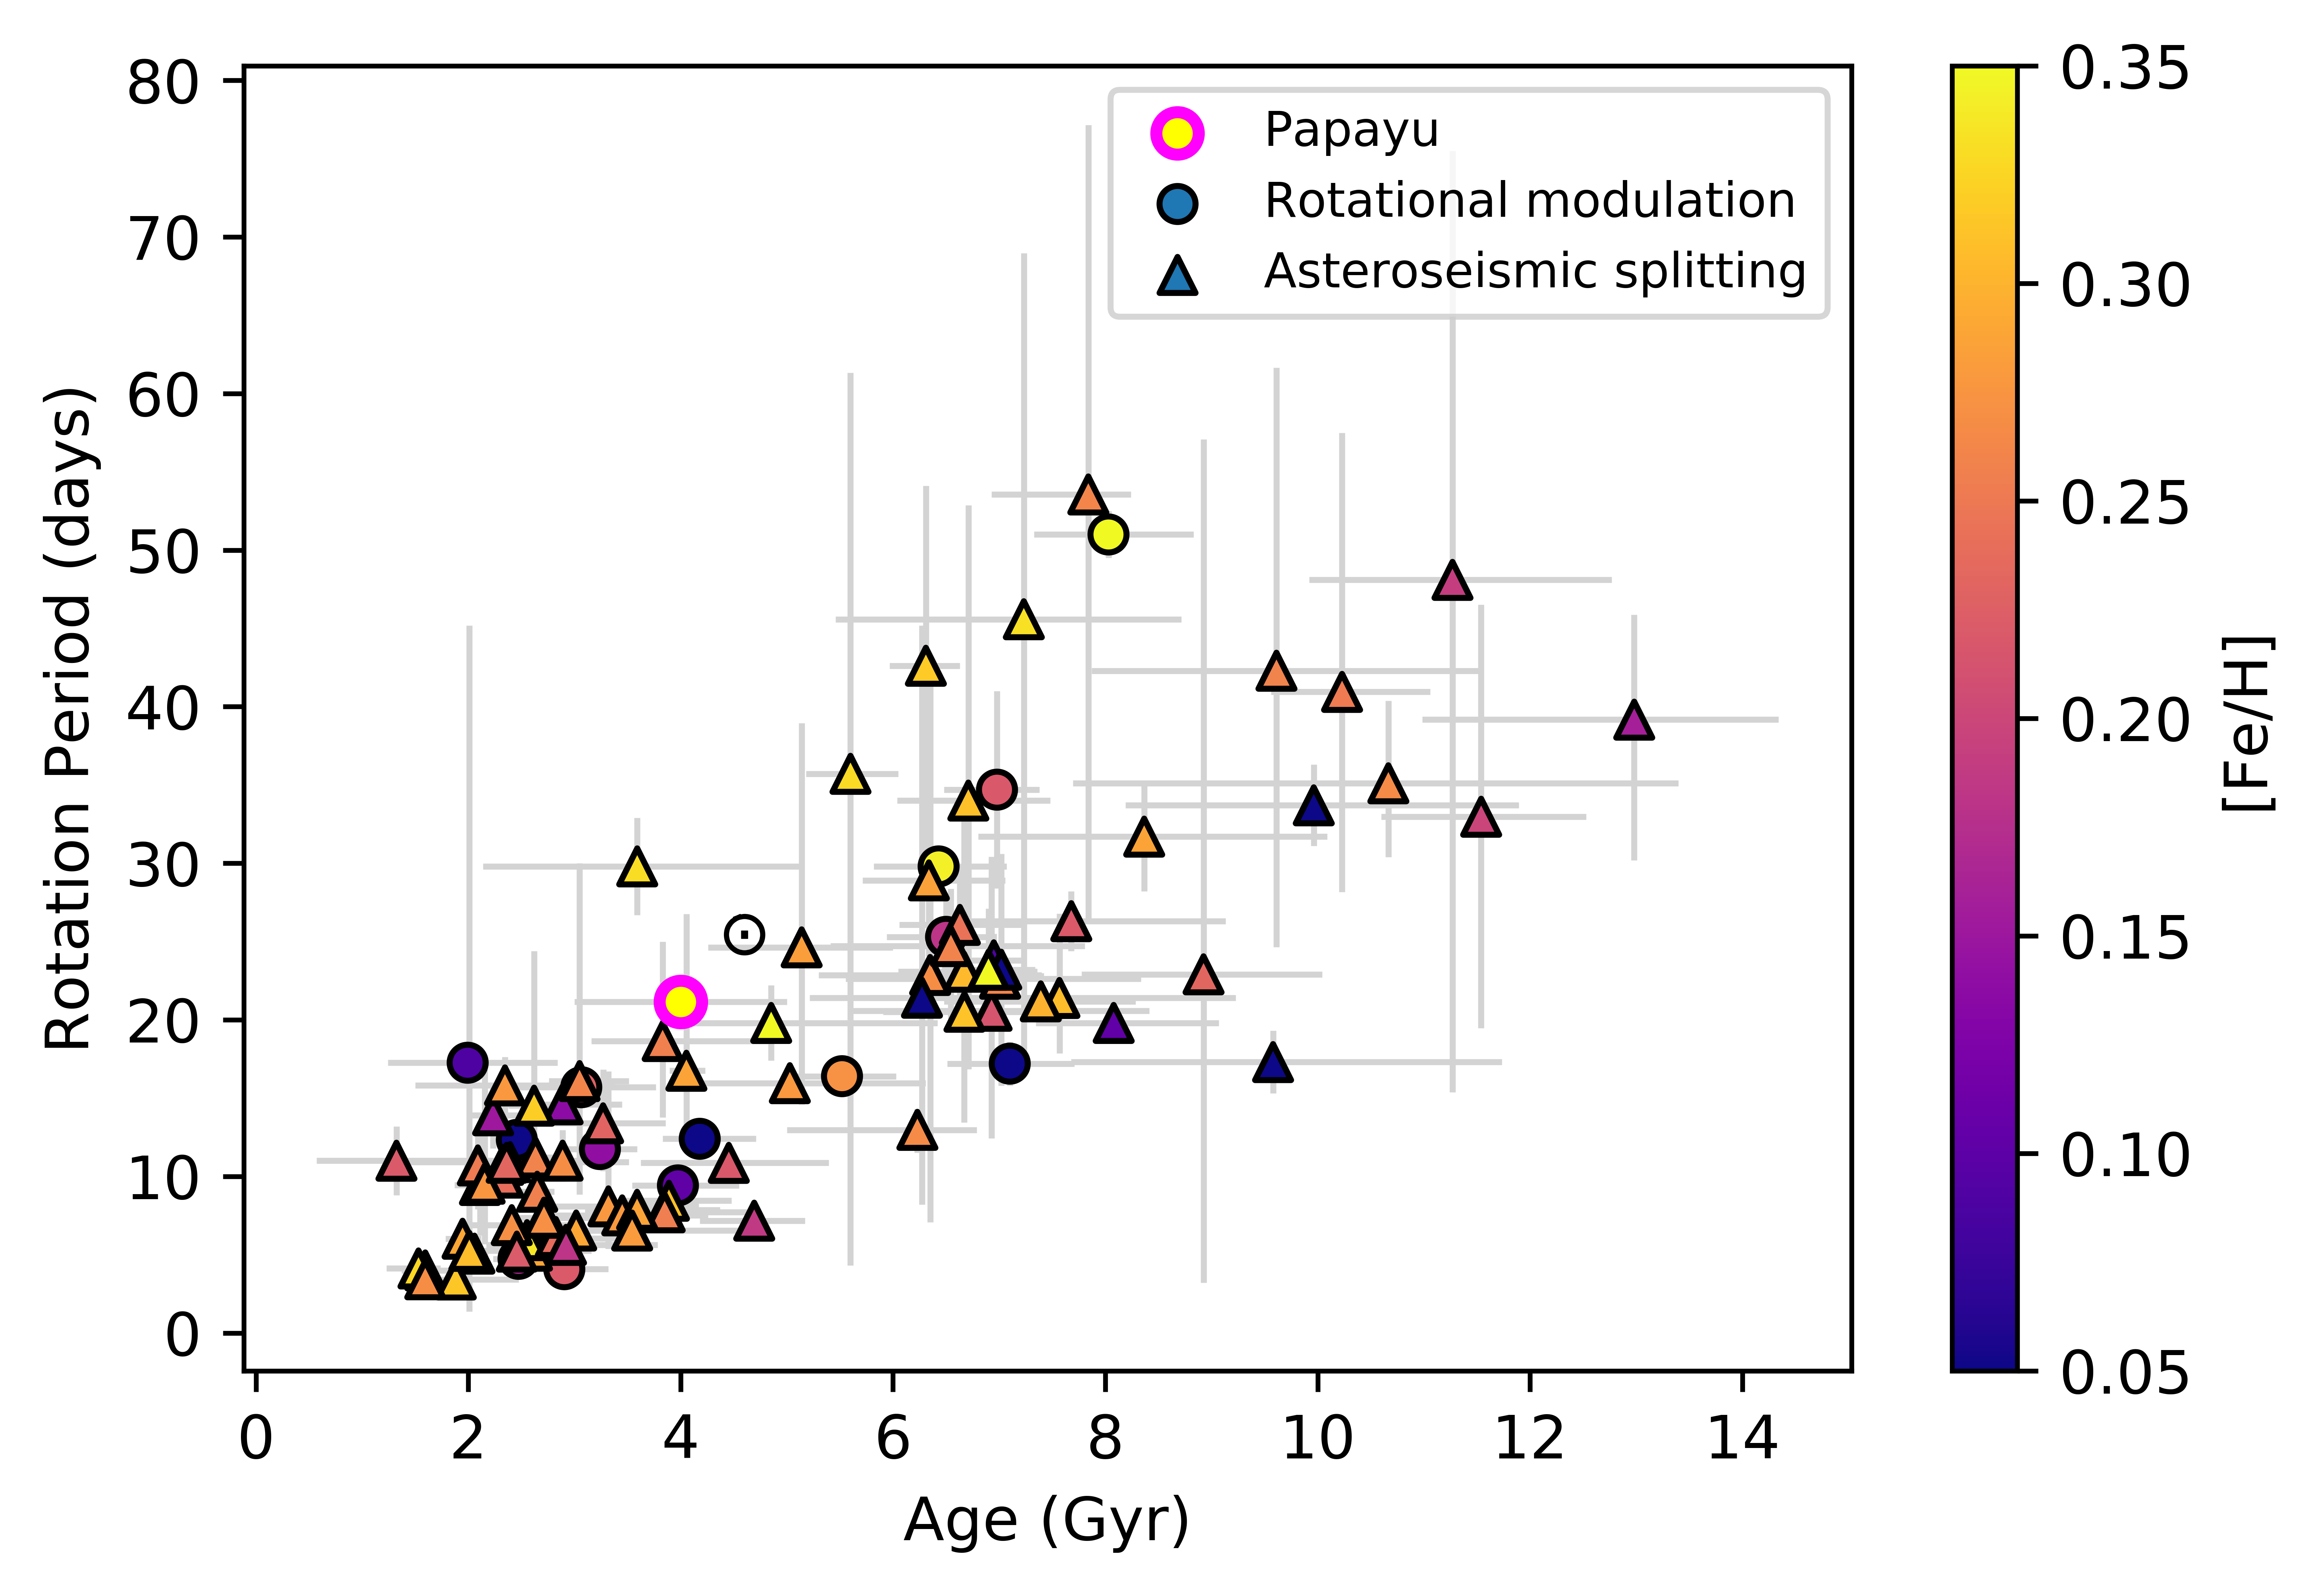

In [253]:
print(jenseismicag_kicid)
print(jenkoiag2_kicid)
print(mcqag_kicid)
print(oli_kicid)
print(['16CygA','16CyB',11244118])
print(len(jenseismicag_kicid)+len(jenkoiag2_kicid)+len(mcqag_kicid)+len(oli_kicid)+3)
# solar values 
sun_teff = 5772 #K
sun_dnu = 135 #microHz
sun_age = 4.574 #Gyr
sun_prot = 25.449 # earth days

papayu_age = 4
papayu_mass = 1.2 #Msun
papayu_teff = 5888 #K
papayu_feh = 0.3 # papayu metallicity

## 28 stars total + oli 
jenage_seismic = jenseismic_ag_age
jeneage_seismic = jenseismic_ag_eage
jenEage_seismic = jenseismic_ag_Eage

jenprot_seismic = jenseismic_ag_prot
jeneprot_seismic = jenseismic_ag_eprot

jenfeh_seismic = jenseismic_ag_feh
jenefeh_seismic = jenseismic_ag_efeh

jenteff_seismic = jenseismic_ag_teff
jeneteff_seismic = jenseismic_ag_eteff
#
jenage_koi = jenkoi_ag2_age
jeneage_koi = jenkoi_ag2_eage
jenEage_koi = jenkoi_ag2_Eage

jenprot_koi = jenkoi_ag2_prot
jeneprot_koi = jenkoi_ag2_eprot 

jenfeh_koi = jenkoi_ag2_feh 
jenefeh_koi = jenkoi_ag2_efeh 

jenteff_koi = jenkoi_ag2_teff
jeneteff_koi = jenkoi_ag2_eteff
# 
oliage = oli_age
olieage = oli_eage
oliEage = oli_Eage

oliprot = oli_prot
olieprot = oli_eprot
oliEprot = oli_Eprot

oliteff= oli_teff
olieteff = oli_eteff

olifeh = oli_feh
oliefeh = oli_efeh
#
jenlastage = np.array([6.95, 7.02, 6.9])
jenlasteage = np.array([0.26, 0.14, 0.44])

jenlastprot =  np.array([23.8, 23.2, 23.2])
jenlasteprot= np.array([1.7, 7.4, 3.9])

jenlastteff = np.array([5825, 5750, 5745])
jenlasteteff = np.array([50, 50, 84])

jenlastfeh = np.array([0.09, 0.05, 0.35])
jenlastefeh = np.array([0.02, 0.02, 0.09])

## 
papayu_eage=0.5
papayu_Eage=0.5
mcqagp_prot = np.append(mcqag_prot,papayu_prot)
mcqagp_age = np.append(mcqagage_age,papayu_age)
mcqagp_teff = np.append(mcqag_teff,papayu_teff)
mcqagp_feh = np.append(mcqag_feh,papayu_feh)

mcqagp_eage = np.append(mcqagage_eage,papayu_eage)
mcqagp_Eage = np.append(mcqagage_Eage,papayu_Eage)
mcqagp_eprot = np.append(mcqag_eprot,papayu_eprot)

#
plt.errorbar(papayu_age,papayu_prot,xerr=1,yerr=papayu_eprot,marker='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.errorbar(mcqagage_age,mcqag_prot,xerr=[mcqagage_eage,mcqagage_Eage],yerr=mcqag_eprot,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.text(papayu_age-1.7,papayu_prot+1, "Papayu",size=8, color='magenta')
plt.scatter(sun_age,sun_prot,marker='$\odot$',color='black',s=60,linewidths=0.1)
plt.scatter(papayu_age,papayu_prot,marker='o',facecolor='None',edgecolor='magenta',s=50,linewidths=2,zorder=3,label='Papayu')

plt.scatter(mcqagp_age,mcqagp_prot,c=mcqagp_feh,edgecolor='black',marker='o',cmap='plasma',label='Rotational modulation')

plt.errorbar(jenage_seismic,jenprot_seismic,xerr=[jeneage_seismic,jenEage_seismic],yerr=jeneprot_seismic,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(jenage_seismic,jenprot_seismic,c=jenfeh_seismic,edgecolor='black',marker='^',cmap='plasma',label='Asteroseismic splitting')

plt.errorbar(jenage_koi,jenprot_koi,xerr=[jeneage_koi,jenEage_koi],yerr=jeneprot_koi,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(jenage_koi,jenprot_koi,c=jenfeh_koi,edgecolor='black',marker='o',cmap='plasma')

plt.errorbar(oliage,oliprot,xerr=[olieage,oliEage],yerr=[olieprot,oliEprot],ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(oliage,oliprot,c=olifeh,edgecolor='black',marker='^',cmap='plasma')

plt.errorbar(jenlastage,jenlastprot,xerr=jenlasteage,yerr=jenlasteprot,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(jenlastage,jenlastprot,c=jenlastfeh,edgecolor='black',marker='^',cmap='plasma')

plt.xlabel('Age (Gyr)')
plt.ylabel('Rotation Period (days)')


plt.legend(loc="best",fontsize=8)
cbar = plt.colorbar()
cbar.set_label('[Fe/H]')


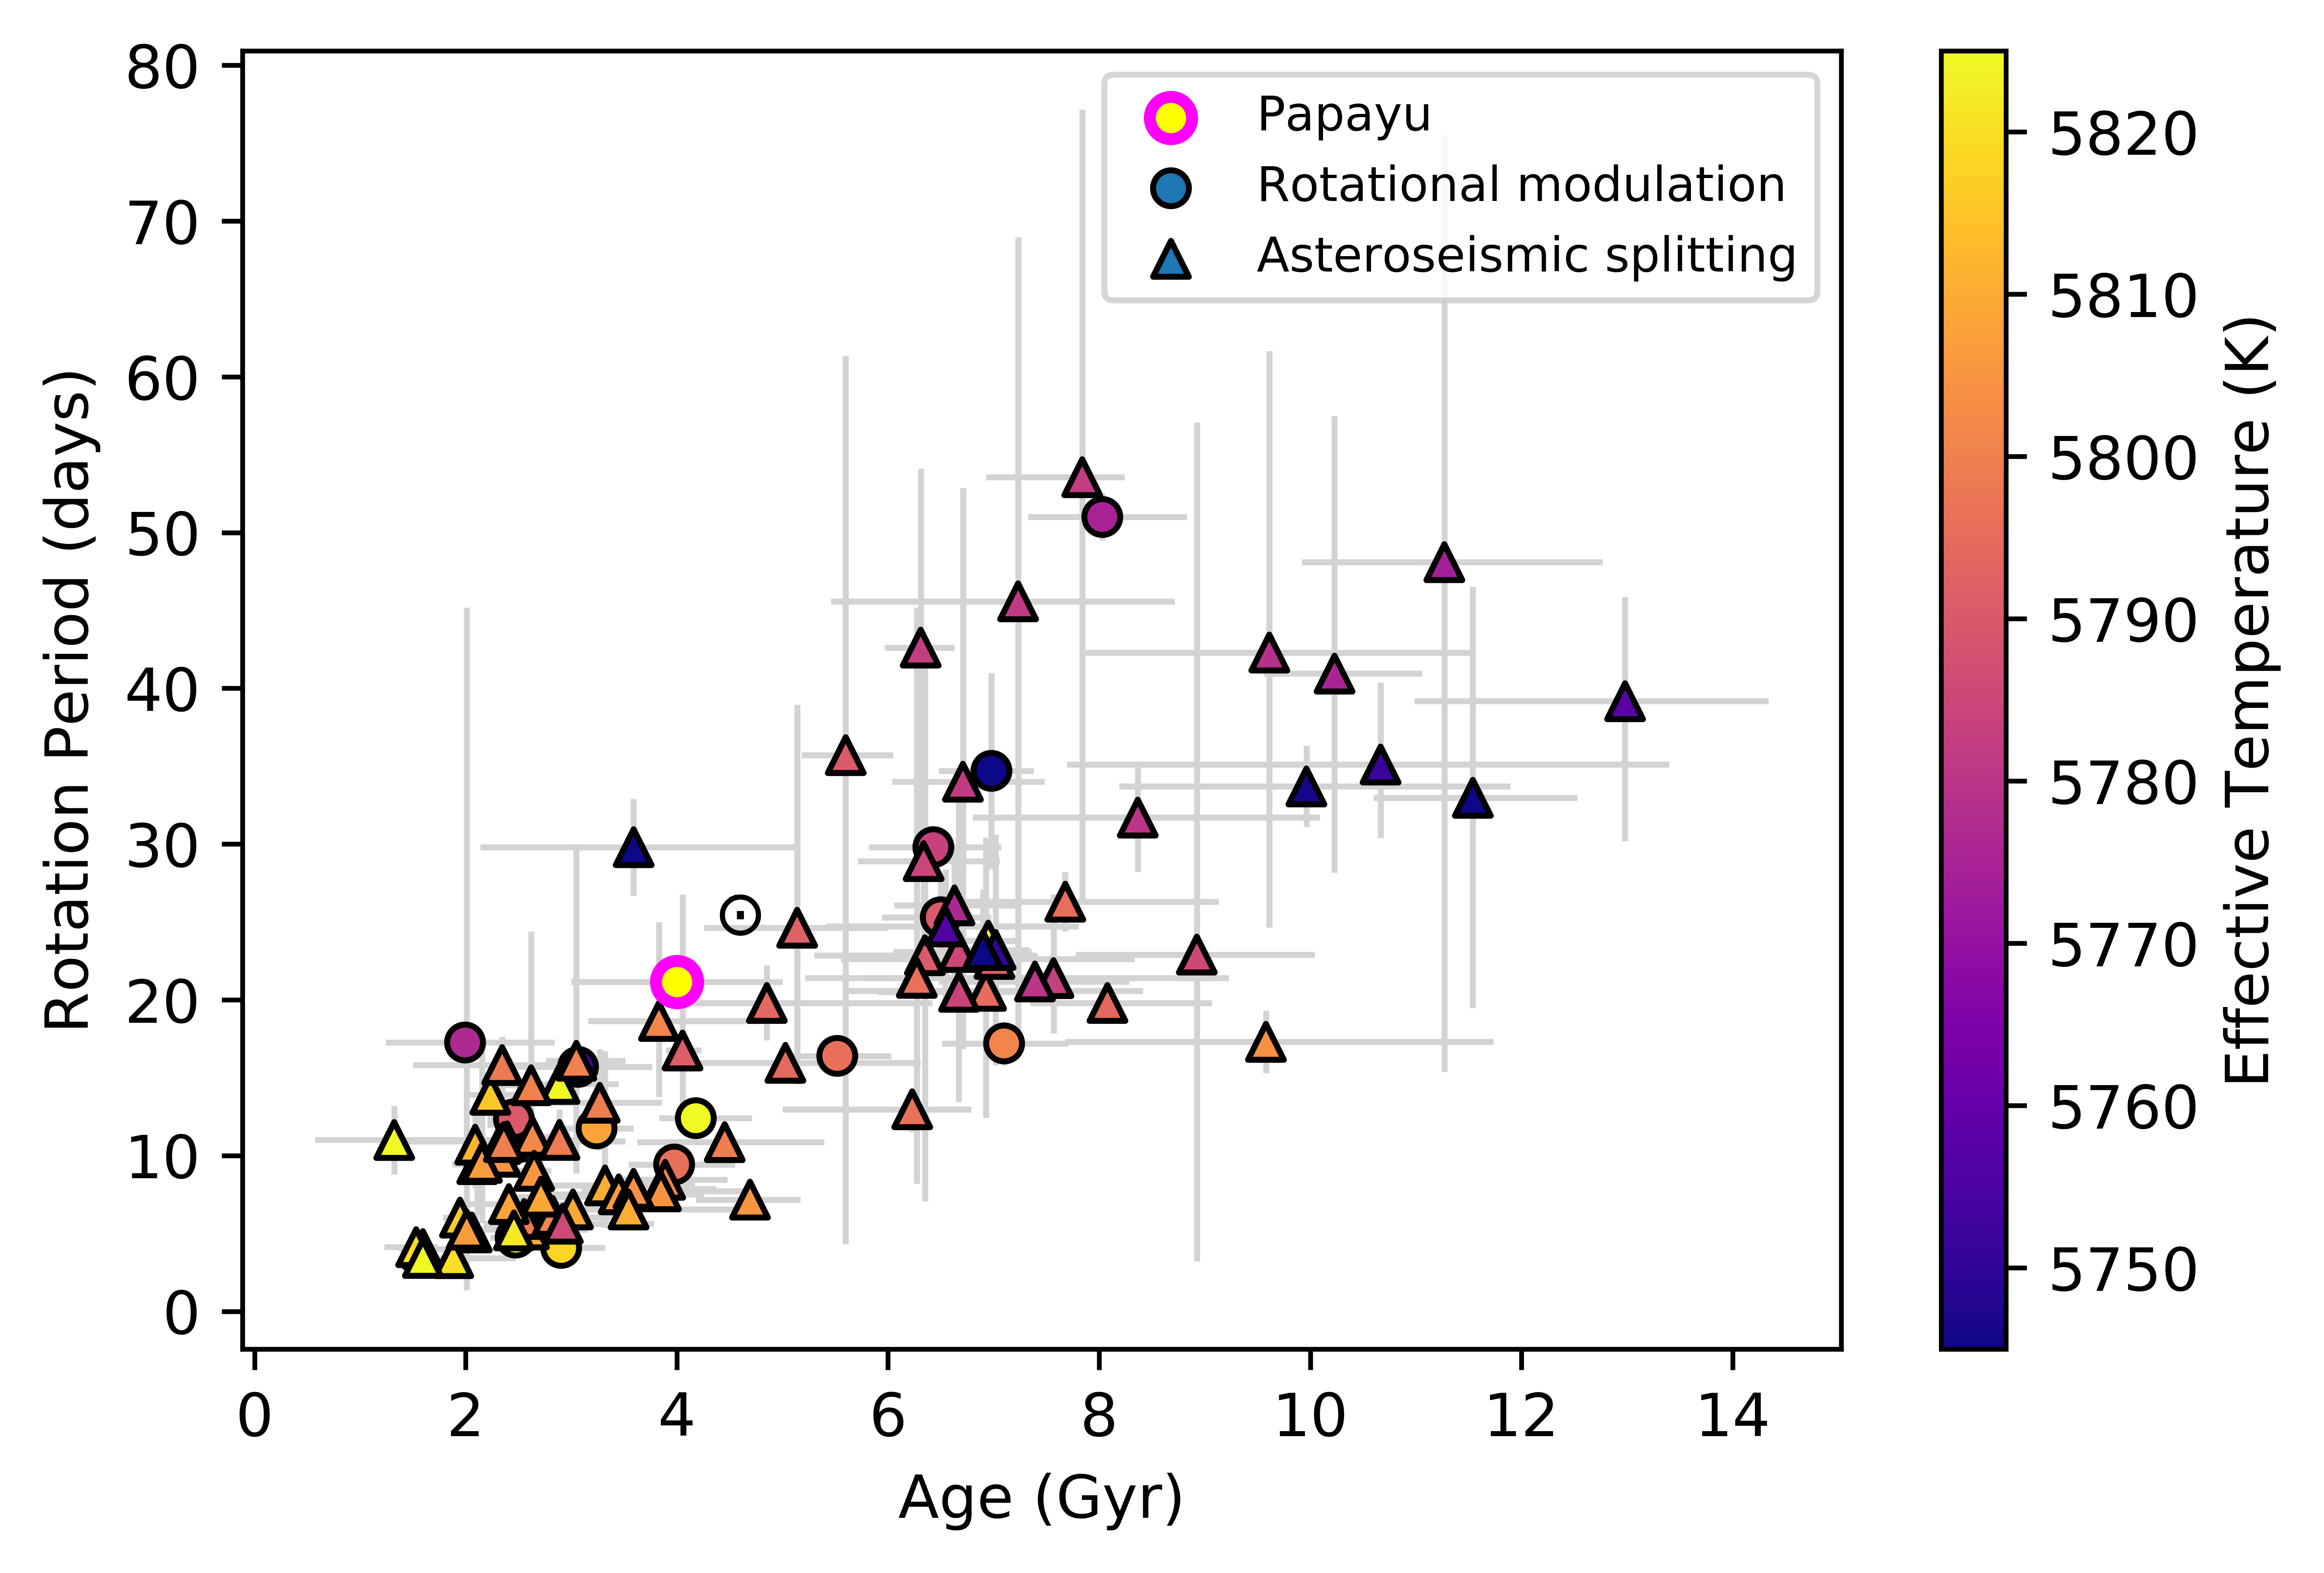

In [252]:
# solar values 
sun_teff = 5772 #K
sun_dnu = 135 #microHz
sun_age = 4.574 #Gyr
sun_prot = 25.449 # earth days

papayu_age = 4
papayu_mass = 1.2 #Msun
papayu_teff = 5888 #K
papayu_feh = 0.3 # papayu metallicity
##
jenage_seismic = jenseismic_ag_age
jeneage_seismic = jenseismic_ag_eage
jenEage_seismic = jenseismic_ag_Eage

jenprot_seismic = jenseismic_ag_prot
jeneprot_seismic = jenseismic_ag_eprot

jenfeh_seismic = jenseismic_ag_feh
jenefeh_seismic = jenseismic_ag_efeh

jenteff_seismic = jenseismic_ag_teff
jeneteff_seismic = jenseismic_ag_eteff
#
jenage_koi = jenkoi_ag2_age
jeneage_koi = jenkoi_ag2_eage
jenEage_koi = jenkoi_ag2_Eage

jenprot_koi = jenkoi_ag2_prot
jeneprot_koi = jenkoi_ag2_eprot 

jenfeh_koi = jenkoi_ag2_feh 
jenefeh_koi = jenkoi_ag2_efeh 

jenteff_koi = jenkoi_ag2_teff
jeneteff_koi = jenkoi_ag2_eteff
# 
oliage = oli_age
olieage = oli_eage
oliEage = oli_Eage

oliprot = oli_prot
olieprot = oli_eprot
oliEprot = oli_Eprot

oliteff= oli_teff
olieteff = oli_eteff

olifeh = oli_feh
oliefeh = oli_efeh
#
jenlastage = np.array([6.95, 7.02, 6.9])
jenlasteage = np.array([0.26, 0.14, 0.44])

jenlastprot =  np.array([23.8, 23.2, 23.2])
jenlasteprot= np.array([1.7, 7.4, 3.9])

jenlastteff = np.array([5825, 5750, 5745])
jenlasteteff = np.array([50, 50, 84])

jenlastfeh = np.array([0.09, 0.05, 0.35])
jenlastefeh = np.array([0.02, 0.02, 0.09])

## 
papayu_eage=0.5
papayu_Eage=0.5
mcqagp_prot = np.append(mcqag_prot,papayu_prot)
mcqagp_age = np.append(mcqagage_age,papayu_age)
mcqagp_teff = np.append(mcqag_teff,papayu_teff)
mcqagp_feh = np.append(mcqag_feh,papayu_feh)

mcqagp_eage = np.append(mcqagage_eage,papayu_eage)
mcqagp_Eage = np.append(mcqagage_Eage,papayu_Eage)
mcqagp_eprot = np.append(mcqag_eprot,papayu_eprot)

# #
# plt.errorbar(papayu_age,papayu_prot,xerr=1,yerr=papayu_eprot,marker='None',ecolor='black', elinewidth=1, capsize=0,zorder=0)
# plt.errorbar(mcqagage_age,mcqag_prot,xerr=[mcqagage_eage,mcqagage_Eage],yerr=mcqag_eprot,ls='None',ecolor='black', elinewidth=1, capsize=0,zorder=0)
# plt.text(papayu_age+0.1,papayu_prot+1, "Papayu",size=10, color='magenta')
# plt.scatter(sun_age,sun_prot,marker='$\odot$',color='black',s=60,linewidths=0.1)

# plt.scatter(mcqagp_age,mcqagp_prot,c=mcqagp_teff,edgecolor='black',marker='o',cmap='plasma',label='Modulation')

# plt.errorbar(jenage_seismic,jenprot_seismic,xerr=jeneage_seismic,yerr=jeneprot_seismic,ls='None',ecolor='black', elinewidth=1, capsize=0,zorder=0)
# plt.scatter(jenage_seismic,jenprot_seismic,c=jenteff_seismic,edgecolor='black',marker='^',cmap='plasma',label='Rotational splitting')

# plt.errorbar(jenage_koi,jenprot_koi,xerr=jeneage_koi,yerr=jeneprot_koi,ls='None',ecolor='black', elinewidth=1, capsize=0,zorder=0)
# plt.scatter(jenage_koi,jenprot_koi,c=jenteff_koi,edgecolor='black',marker='o',cmap='plasma')

#
#
plt.errorbar(papayu_age,papayu_prot,xerr=1,yerr=papayu_eprot,marker='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.errorbar(mcqagage_age,mcqag_prot,xerr=[mcqagage_eage,mcqagage_Eage],yerr=mcqag_eprot,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.text(papayu_age-1.7,papayu_prot+1, "Papayu",size=8, color='magenta')
plt.scatter(sun_age,sun_prot,marker='$\odot$',color='black',s=60,linewidths=0.1)
plt.scatter(papayu_age,papayu_prot,marker='o',facecolor='None',edgecolor='magenta',s=50,linewidths=2,zorder=3,label='Papayu')

plt.scatter(mcqagp_age,mcqagp_prot,c=mcqagp_teff,edgecolor='black',marker='o',cmap='plasma',label='Rotational modulation')

plt.errorbar(jenage_seismic,jenprot_seismic,xerr=[jeneage_seismic,jenEage_seismic],yerr=jeneprot_seismic,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(jenage_seismic,jenprot_seismic,c=jenteff_seismic,edgecolor='black',marker='^',cmap='plasma',label='Asteroseismic splitting')

plt.errorbar(jenage_koi,jenprot_koi,xerr=[jeneage_koi,jenEage_koi],yerr=jeneprot_koi,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(jenage_koi,jenprot_koi,c=jenteff_koi,edgecolor='black',marker='o',cmap='plasma')

plt.errorbar(oliage,oliprot,xerr=[olieage,oliEage],yerr=[olieprot,oliEprot],ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(oliage,oliprot,c=oliteff,edgecolor='black',marker='^',cmap='plasma')

plt.errorbar(jenlastage,jenlastprot,xerr=jenlasteage,yerr=jenlasteprot,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(jenlastage,jenlastprot,c=jenlastteff,edgecolor='black',marker='^',cmap='plasma')

plt.xlabel('Age (Gyr)')
plt.ylabel('Rotation Period (days)')


plt.legend(loc="best",fontsize=8)
cbar = plt.colorbar()
cbar.set_label('Effective Temperature (K)')


In [222]:
print("jenlastteff",jenlastteff)
print("oliteff",oliteff)
print("jenteff_koi",jenteff_koi)
print("jenteff_seismic",jenteff_seismic)
print("mcqagp_teff",mcqagp_teff)
# print()
#5688 
#6088

# teffrange = np.arange(5688,6089,1)

# oliteff_age =[]
# oliteff_Eage =[]
# oliteff_eage =[]

# oliteff_feh =[]
# oliteff_efeh =[]
# oliteff_teff=[]
# oliteff_eteff=[]
# oliteff_prot=[]
# oliteff_eprot=[]
# oliteff_Eprot=[]

  
# jenseismicteff_ag_age =[]
# jenseismicteff_ag_Eage =[]
# jenseismicteff_ag_eage =[]

# jenseismicteff_ag_feh =[]
# jenseismicteff_ag_efeh =[]
# jenseismicteff_ag_teff=[]
# jenseismicteff_ag_eteff=[]
# jenseismicteff_ag_prot=[]
# jenseismicteff_ag_eprot=[]

# for teff in teffrange:
#     print(teff)
#     row_olliei = ollie[np.where(ollie_teff==teff),:][0][0]
    
#     ollie_kicidi = ollie[np.where(ollie_teff==teff),1][0][0]

#     ollie_teffi = ollie[np.where(ollie_teff==teff),2][0][0] #teff
#     ollie_eteffi = ollie[np.where(ollie_teff==teff),5][0][0] #eteff

#     ollie_fehi = ollie[np.where(ollie_teff==teff),9][0][0] #feh
#     ollie_efehi = ollie[np.where(ollie_teff==teff),7][0][0] #feh

#     ollie_agei = ollie[np.where(ollie_teff==teff),3][0][0] #basta
#     ollie_Eagei = ollie[np.where(ollie_teff==teff),19][0][0] # E -< pos unc
#     ollie_eagei = ollie[np.where(ollie_teff==teff),10][0][0] #e -< neg unc

#     ollie_dnui = ollie[np.where(ollie_teff==teff),4][0][0] #basta
#     ollie_ednui = ollie[np.where(ollie_teff==teff),6][0][0] #basta


#     ollie_proti = ollie[np.where(ollie_teff==teff),55][0][0] #days ... rotation period
#     ollie_eproti = ollie[np.where(ollie_teff==teff),54][0][0] #days ... err prot
#     ollie_Eproti = ollie[np.where(ollie_teff==teff),56][0][0] #days ... err prot
    
# #     print(jen_kicid_koii)
# #     print(jen_age_koii)
# #     oliag2_age.append(ollie_ag2_agei)
# #     oliag2_Eage.append(ollie_ag2_Eagei)
# #     oliag2_eage.append(ollie_ag2_eagei)
    
#     oliteff_age.append(ollie_agei)
#     oliteff_Eage.append(ollie_Eagei)
#     oliteff_eage.append(ollie_eagei)
    
#     oliteff_feh.append(ollie_fehi)
#     oliteff_efeh.append(ollie_efehi)
    
#     oliteff_teff.append(ollie_teffi)
#     oliteff_eteff.append(ollie_eteffi)

#     oliteff_prot.append(ollie_proti)
#     oliteff_Eprot.append(ollie_Eproti)
#     oliteff_eprot.append(ollie_eproti)
    
# for teff in teffrange:
#     row_agage = aguirreages[np.where(ag_teff==teff),:]
    
#     agagekicidi = aguirreages[np.where(ag_teff==teff),0][0][0]

#     agageagei = aguirreages[np.where(ag_teff==teff),1][0][0]
#     agageEagei = aguirreages[np.where(ag_teff==teff),2][0][0]
#     agageeagei = aguirreages[np.where(ag_teff==teff),3][0][0]


# #         ##### jen roation periods
# #     jenprot_maj = jen[np.where(jen_kicids.astype('float64')==kicid),16][0][0] #days ... rotation period
# #     jeneprot_maj = jen[np.where(jen_kicids.astype('float64')==kicid),17][0][0] #days ... err prot
# #     jen_notei = jen[np.where(jen_kicids.astype('float64')==kicid),18][0][0]
# #     print(jenprot_maj)

#     row_jen_seismici = jen[np.where(jen_teff_seismic==teff),:][0][0]
#     jen_kicid_seismici = jen[np.where(jen_teff_seismic==teff),0][0][0]

#     jen_teff_seismici = jen[np.where(jen_teff_seismic==teff),12][0][0] #teff
    
#     jen_eteff_seismici = jen[np.where(jen_teff_seismic==teff),13][0][0] #eteff

#     jen_feh_seismici = jen[np.where(jen_teff_seismic==teff),14][0][0] #feh
#     jen_efeh_seismici = jen[np.where(jen_teff_seismic==teff),15][0][0] 
#     jen_age_seismici = jen[np.where(jen_teff_seismic==teff),9][0][0]  #basta
#     jen_eage_seismici = jen[np.where(jen_teff_seismic==teff),10][0][0] #e_basta

#     jen_prot_seismici = jen[np.where(jen_teff_seismic==teff),16][0][0] 
#     jen_eprot_seismici = jen[np.where(jen_teff_seismic==teff),17][0][0]#days ... err prot
    
# #     print(jen_kicid_koii)
# #     print(jen_age_koii)
    
#     jenseismicteff_ag_age.append(agageagei)
#     jenseismicteff_ag_Eage.append(agageEagei)
#     jenseismicteff_ag_eage.append(agageeagei)
    
#     jenseismicteff_ag_feh.append(jen_feh_seismici)
#     jenseismicteff_ag_efeh.append(jen_efeh_seismici)
    
#     jenseismicteff_ag_teff.append(jen_teff_seismici)
#     jenseismicteff_ag_eteff.append(jen_teff_seismici)

#     jenseismicteff_ag_prot.append(jen_prot_seismici)
#     jenseismicteff_ag_eprot.append(jen_eprot_seismici)

jenlastteff [5825 5750 5745]
oliteff [6343, 5669, 6134, 5622, 6270, 5845, 5952, 6169, 5046, 6463, 6072, 6239, 6144, 5945, 6325, 6174, 5784, 6350, 5982, 5793, 6225, 5781, 5647, 6326, 6614, 6384, 6193, 6107, 5805, 6130, 5853, 6037, 6313, 6331, 6479, 5832, 6068, 5775, 6171, 6235, 5309, 6173, 6343, 6122, 6143, 5719, 6246, 5270, 6400, 6538, 6278, 6047, 6253, 6321, 5860, 6132, 5964, 6150, 6548, 6642, 5180, 6276, 5825, 5750, 5964, 6580]
jenteff_koi [5871, 5825, 5699, 5460, 5770, 6104, 5911]
jenteff_seismic [6040, 5710, 5840, 5935, 5855, 5400, 5390, 5840, 6125, 6120, 6030]
mcqagp_teff [6344. 6305. 6248. 6067. 5949. 6146. 6179. 5888.]
5688


IndexError: index 0 is out of bounds for axis 0 with size 0

In [286]:
# print("jenlastteff",jenlastteff)
# print("oliteff",oliteff)
# print("jenteff_koi",jenteff_koi)
# print("jenteff_seismic",jenteff_seismic)
# print("mcqagp_teff",mcqagp_teff)

# jenlastteff [5825 5750 5745]
# oliteff [6343, 5669, 6134, 5622, 6270, 5845, 5952, 6169, 5046, 6463, 6072, 6239, 6144, 5945, 6325, 6174, 5784, 6350, 5982, 5793, 6225, 5781, 5647, 6326, 6614, 6384, 6193, 6107, 5805, 6130, 5853, 6037, 6313, 6331, 6479, 5832, 6068, 5775, 6171, 6235, 5309, 6173, 6343, 6122, 6143, 5719, 6246, 5270, 6400, 6538, 6278, 6047, 6253, 6321, 5860, 6132, 5964, 6150, 6548, 6642, 5180, 6276, 5825, 5750, 5964, 6580]
# jenteff_koi [5871, 5825, 5699, 5460, 5770, 6104, 5911]
# jenteff_seismic [6040, 5710, 5840, 5935, 5855, 5400, 5390, 5840, 6125, 6120, 6030]
# mcqagp_teff [6344. 6305. 6248. 6067. 5949. 6146. 6179. 5888.]

# print()
#5688 
#6088

jenlastteff =  [5825,5750,5745] # all in
oliteff_nu =  [5845,5952,6072,5945,5784,5982,5793,5781,5805,5853,6037,5832,6068,5775,5719,6047,5860,5964,5825,5750,5964]
jenteff_koi_nu =  [5871, 5825, 5699,5770,5911]
jenteff_seismic_nu =  [6040, 5710, 5840, 5935, 5855,5840,6030]
mcqagp_teff_nu = [6067,5949,5888]

###################################################### OLLIE
oliteff_kicid=[]
oliteff_age =[]
oliteff_Eage =[]
oliteff_eage =[]
oliteff_feh =[]
oliteff_efeh =[]
oliteff_teff=[]
oliteff_eteff=[]
oliteff_prot=[]
oliteff_eprot=[]
oliteff_Eprot=[]

# neffsplit_ollie = ollie[:,28]
# print(neffsplit_ollie)

for teff in oliteff_nu:
    
    neffsplit_olliei = ollie[np.where(ollie_teff==teff),28][0][0]
    rhat_flag_olliei = ollie[np.where(ollie_teff==teff),60][0][0]

    if neffsplit_olliei<1000: ### ditch the not great ones
        continue
    if rhat_flag_olliei=='rhat_1': ### that don't converge
        continue
        
#     print(neffsplit_olliei)
#     print(rhat_flag_olliei)
    row_olliei = ollie[np.where(ollie_teff==teff),:][0][0]
    ollie_kicidi = ollie[np.where(ollie_teff==teff),1][0][0]

    ollie_teffi = ollie[np.where(ollie_teff==teff),2][0][0] #teff
    ollie_eteffi = ollie[np.where(ollie_teff==teff),5][0][0] #eteff

    ollie_fehi = ollie[np.where(ollie_teff==teff),9][0][0] #feh
    ollie_efehi = ollie[np.where(ollie_teff==teff),7][0][0] #feh

    ollie_agei = ollie[np.where(ollie_teff==teff),3][0][0] #basta
    ollie_Eagei = ollie[np.where(ollie_teff==teff),19][0][0] # E -< pos unc
    ollie_eagei = ollie[np.where(ollie_teff==teff),10][0][0] #e -< neg unc

    ollie_dnui = ollie[np.where(ollie_teff==teff),4][0][0] #basta
    ollie_ednui = ollie[np.where(ollie_teff==teff),6][0][0] #basta


    ollie_proti = ollie[np.where(ollie_teff==teff),55][0][0] #days ... rotation period
    ollie_eproti = ollie[np.where(ollie_teff==teff),54][0][0] #days ... err prot
    ollie_Eproti = ollie[np.where(ollie_teff==teff),56][0][0] #days ... err prot 
    
    oliteff_kicid.append(ollie_kicidi)
    oliteff_age.append(ollie_agei)
    oliteff_Eage.append(ollie_Eagei)
    oliteff_eage.append(ollie_eagei)
    
    oliteff_feh.append(ollie_fehi)
    oliteff_efeh.append(ollie_efehi)
    
    oliteff_teff.append(ollie_teffi)
    oliteff_eteff.append(ollie_eteffi)

    oliteff_prot.append(ollie_proti)
    oliteff_Eprot.append(ollie_Eproti)
    oliteff_eprot.append(ollie_eproti)
# print(oliteff_teff)
# print(len(oliteff_teff))
########################################################### jen koi
# print(jenteff_koi)
# print(jenteff_koi_nu)
jenkoiteff_index = np.array([0,1,2,4,6])

jenage_koiteff=[]
jeneage_koiteff=[]
jenEage_koiteff=[]

jenprot_koiteff=[]
jeneprot_koiteff=[]

jenfeh_koiteff=[]
jenefeh_koiteff=[]

jenteff_koiteff=[]
jeneteff_koiteff=[]

for i in jenkoiteff_index:
    jenage_koiteff.append(jenage_koi[i])
    jeneage_koiteff.append(jeneage_koi[i])
    jenEage_koiteff.append(jenEage_koi[i])

    jenprot_koiteff.append(jenprot_koi[i])
    jeneprot_koiteff.append(jeneprot_koi[i])

    jenfeh_koiteff.append(jenfeh_koi[i])
    jenefeh_koiteff.append(jenefeh_koi[i])

    jenteff_koiteff.append(jenteff_koi[i])
    jeneteff_koiteff.append(jeneteff_koi[i])

########################################################### jen seismic
# print(jenteff_seismic)
# print(jenteff_seismic_nu)
jenseismicteff_index=[0,1,2,3,4,7,10]

jenage_seismicteff=[]
jeneage_seismicteff=[]
jenEage_seismicteff=[]

jenprot_seismicteff=[]
jeneprot_seismicteff=[]

jenfeh_seismicteff=[]
jenefeh_seismicteff=[]

jenteff_seismicteff=[]
jeneteff_seismicteff=[]

for i in jenseismicteff_index:
    jenage_seismicteff.append(jenage_seismic[i])
    jeneage_seismicteff.append(jeneage_seismic[i])
    jenEage_seismicteff.append(jenEage_seismic[i])

    jenprot_seismicteff.append(jenprot_seismic[i])
    jeneprot_seismicteff.append(jeneprot_seismic[i])

    jenfeh_seismicteff.append(jenfeh_seismic[i])
    jenefeh_seismicteff.append(jenefeh_seismic[i])

    jenteff_seismicteff.append(jenteff_seismic[i]) 
    jeneteff_seismicteff.append(jeneteff_seismic[i])
# print(jenteff_seismicteff)
########################################################### mcqag 
# print(mcqagp_teff)
# print(mcqagp_teff_nu)
mcqagp_teff_index = np.array([3,4,7])

mcqagp_protteff = []
mcqagp_ageteff = []
mcqagp_teffteff = []
mcqagp_fehteff = []
mcqagp_eageteff = [] 
mcqagp_Eageteff  = []
mcqagp_eprotteff = []
for i in mcqagp_teff_index :
    mcqagp_protteff.append(mcqagp_prot[i])
    mcqagp_ageteff.append(mcqagp_age[i])
    mcqagp_teffteff.append(mcqagp_teff[i])
    mcqagp_fehteff.append(mcqagp_feh[i])
    mcqagp_eageteff.append(mcqagp_eage[i]) 
    mcqagp_Eageteff.append(mcqagp_Eage[i]) 
    mcqagp_eprotteff.append(mcqagp_eprot[i]) 
# print(mcqagp_teffteff)
####################################################################
####################################################################
# print(oliteff_kicid)


2534
nan
2051
nan
3345
nan
1612
nan
2001
nan
3747
nan
2058
nan
3895
nan
4617
nan
4575
nan
4286
nan
1955
nan
4286
nan


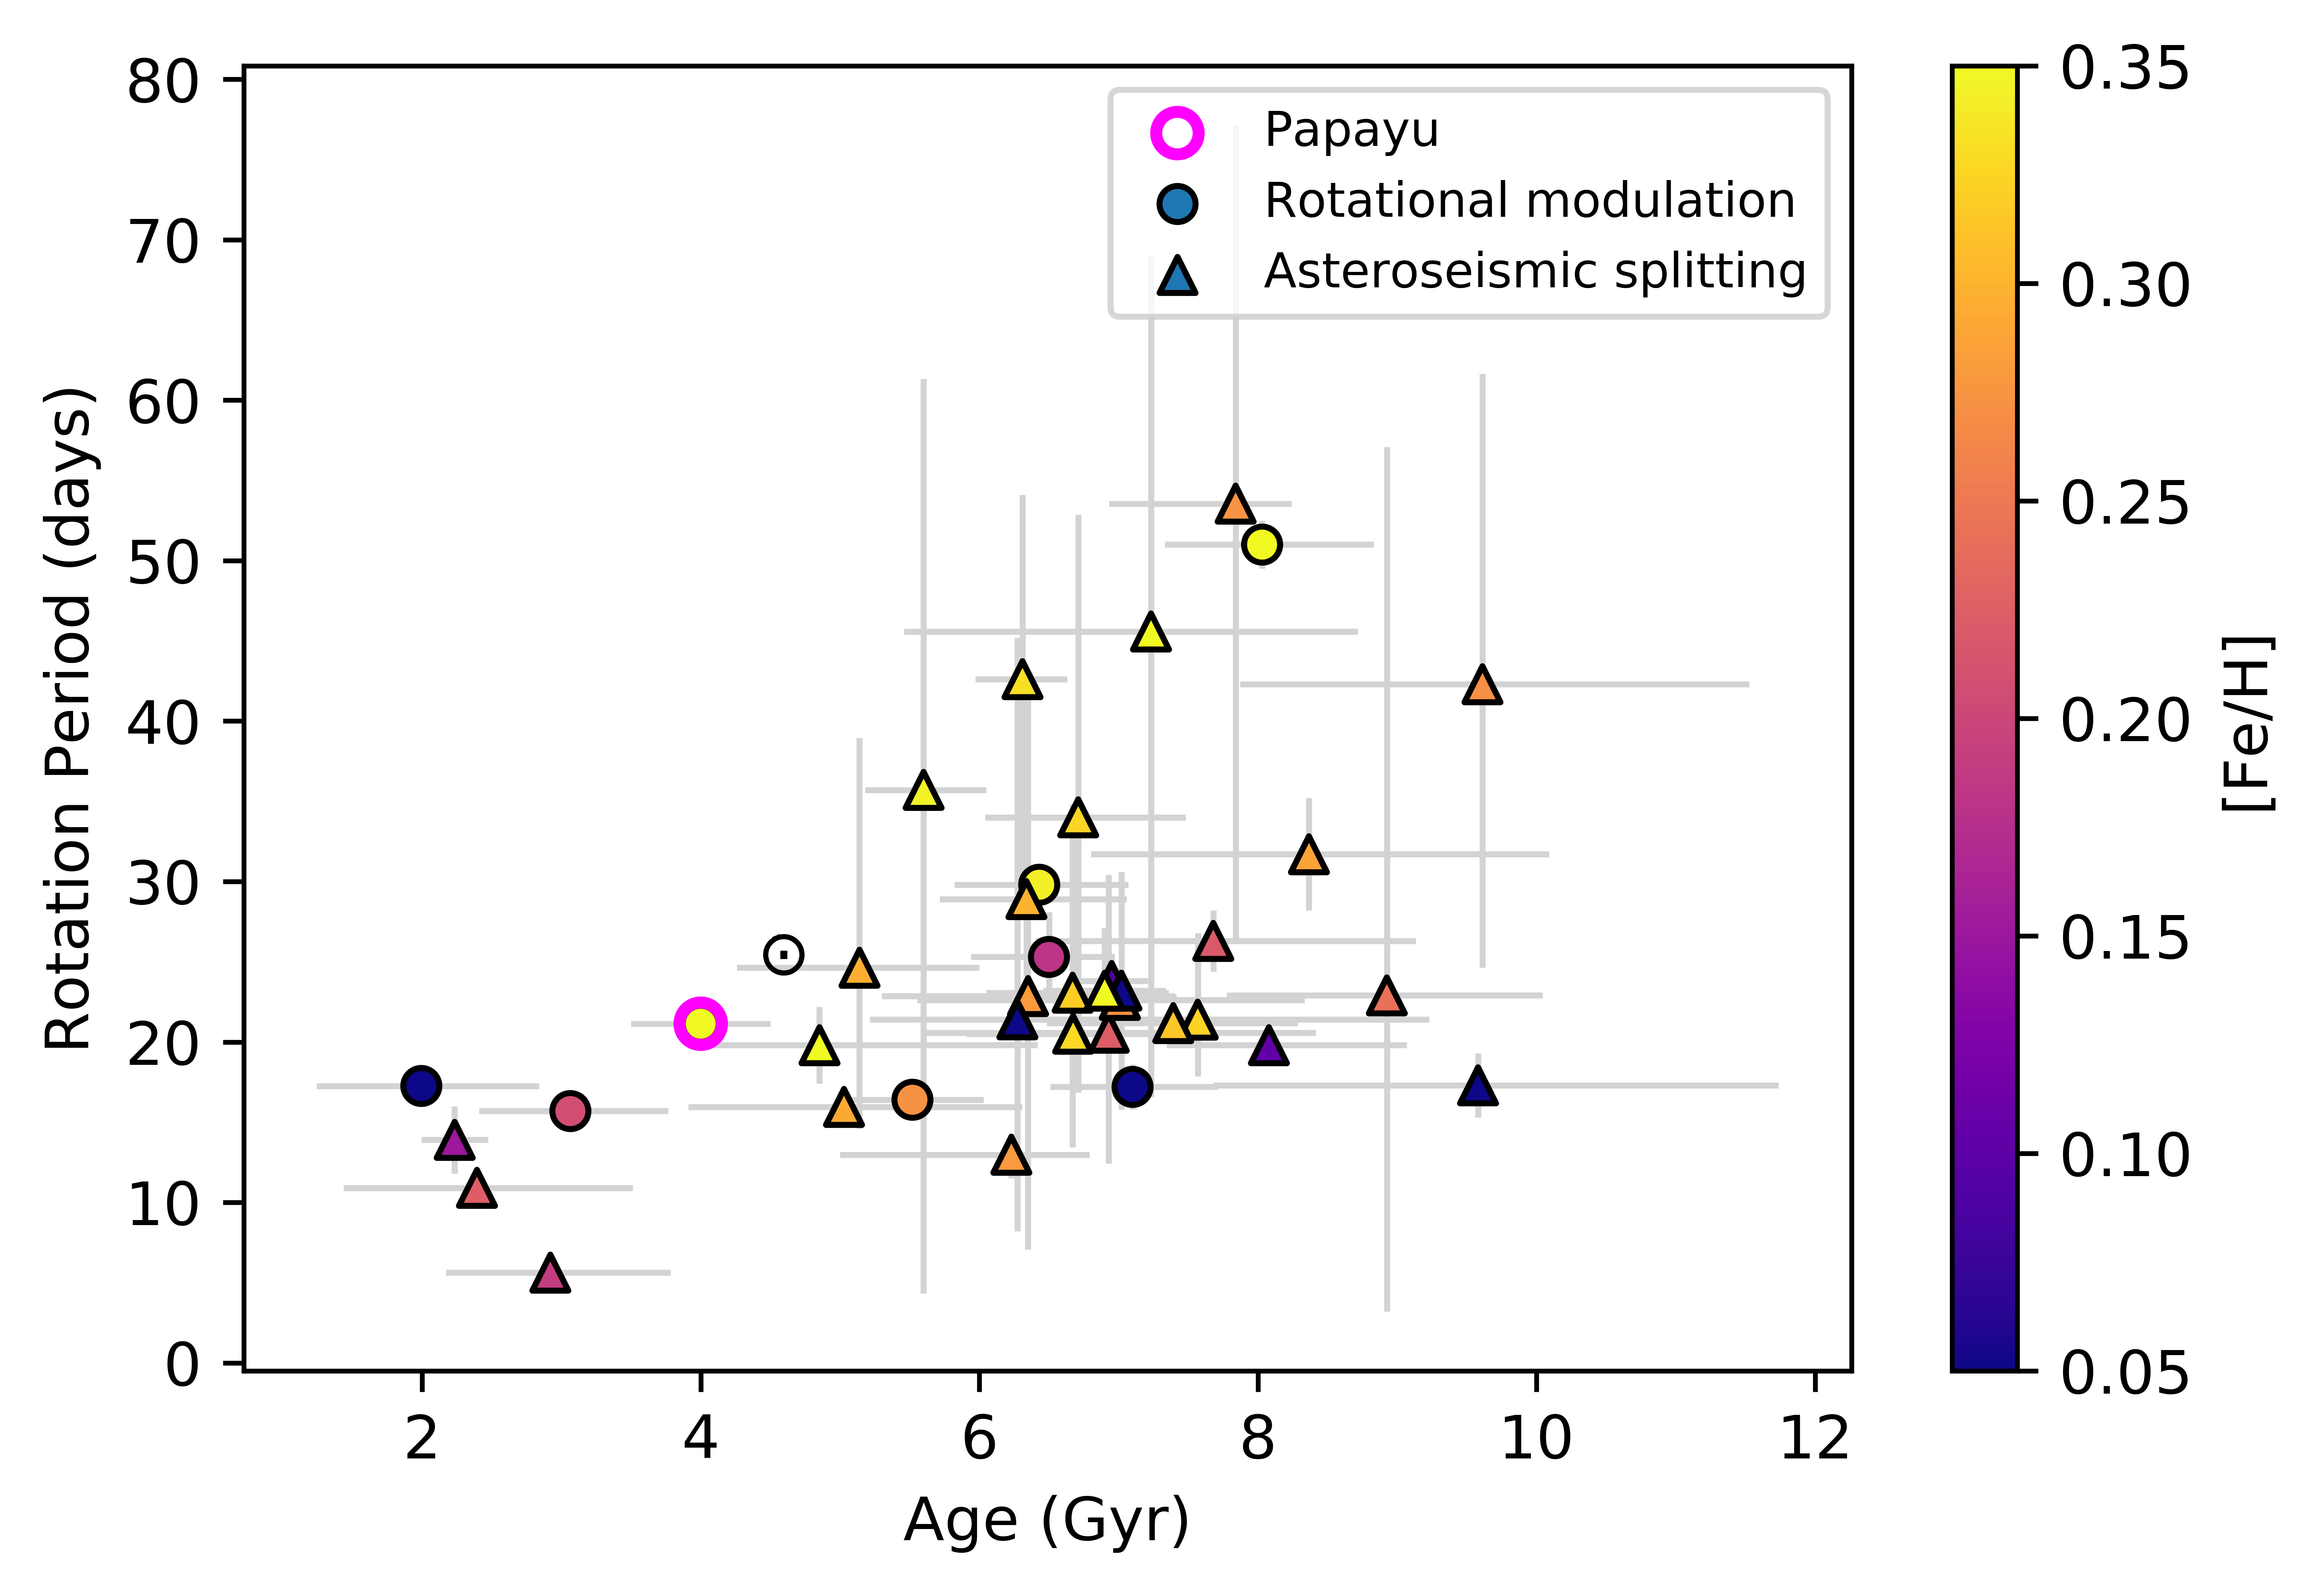

In [255]:
# plt.errorbar(papayu_age,papayu_prot,xerr=1,yerr=papayu_eprot,marker='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.errorbar(mcqagp_ageteff,mcqagp_protteff,xerr=[mcqagp_eageteff,mcqagp_Eageteff],yerr=mcqagp_eprotteff,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.text(papayu_age-1.7,papayu_prot+1, "Papayu",size=8, color='magenta')
plt.scatter(sun_age,sun_prot,marker='$\odot$',color='black',s=60,linewidths=0.1)
plt.scatter(papayu_age,papayu_prot,marker='o',facecolor='None',edgecolor='magenta',s=50,linewidths=2,zorder=3,label='Papayu')

plt.scatter(mcqagp_ageteff,mcqagp_protteff,c=mcqagp_fehteff,edgecolor='black',marker='o',cmap='plasma',label='Rotational modulation')

plt.errorbar(jenage_seismicteff,jenprot_seismicteff,xerr=[jeneage_seismicteff,jenEage_seismicteff],yerr=jeneprot_seismicteff,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(jenage_seismicteff,jenprot_seismicteff,c=jenfeh_seismicteff,edgecolor='black',marker='^',cmap='plasma',label='Asteroseismic splitting')

plt.errorbar(jenage_koiteff,jenprot_koiteff,xerr=[jeneage_koiteff,jenEage_koiteff],yerr=jeneprot_koiteff,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(jenage_koiteff,jenprot_koiteff,c=jenfeh_koiteff,edgecolor='black',marker='o',cmap='plasma')

plt.errorbar(oliteff_age,oliteff_prot,xerr=[oliteff_eage,oliteff_Eage],yerr=[oliteff_eprot,oliteff_Eprot],ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(oliteff_age,oliteff_prot,c=oliteff_feh,edgecolor='black',marker='^',cmap='plasma')

plt.errorbar(jenlastage,jenlastprot,xerr=jenlasteage,yerr=jenlasteprot,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(jenlastage,jenlastprot,c=jenlastfeh,edgecolor='black',marker='^',cmap='plasma')

plt.xlabel('Age (Gyr)')
plt.ylabel('Rotation Period (days)')


plt.legend(loc="best",fontsize=8)
cbar = plt.colorbar()
cbar.set_label('[Fe/H]')

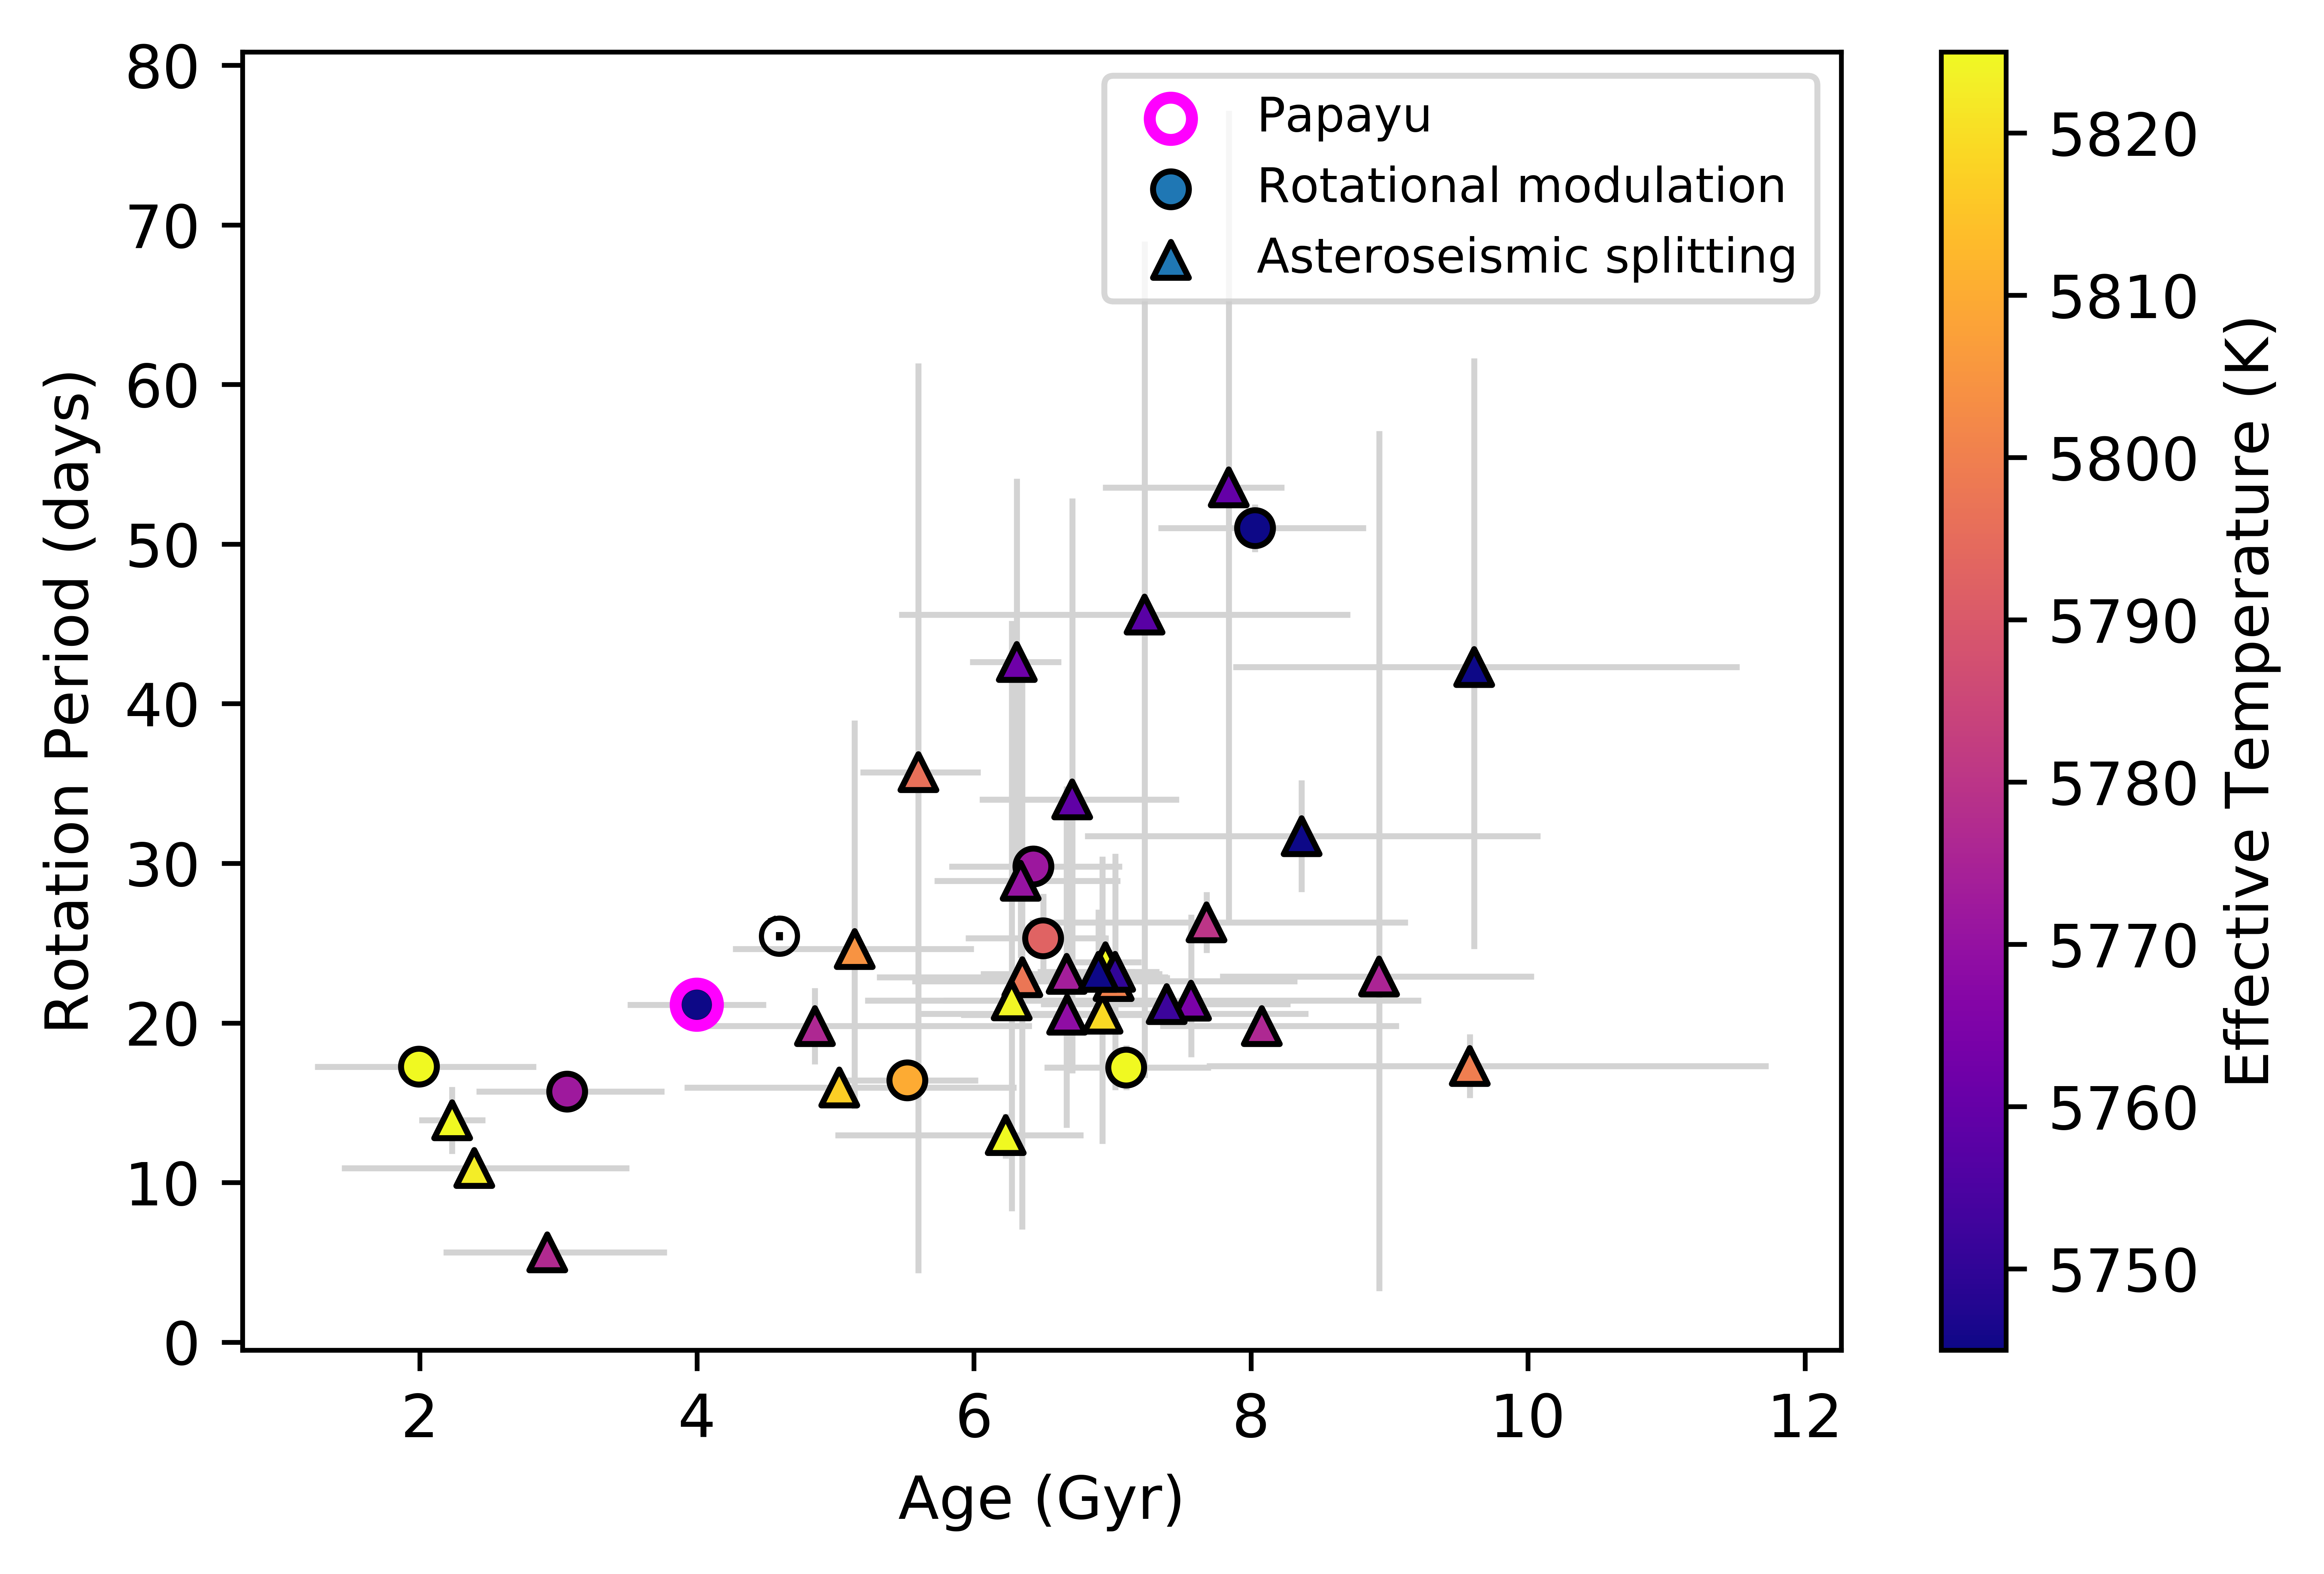

In [257]:
# plt.errorbar(papayu_age,papayu_prot,xerr=1,yerr=papayu_eprot,marker='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.errorbar(mcqagp_ageteff,mcqagp_protteff,xerr=[mcqagp_eageteff,mcqagp_Eageteff],yerr=mcqagp_eprotteff,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
# plt.text(papayu_age-1.7,papayu_prot+1, "Papayu",size=8, color='magenta')
plt.scatter(sun_age,sun_prot,marker='$\odot$',color='black',s=60,linewidths=0.1)
plt.scatter(papayu_age,papayu_prot,marker='o',facecolor='None',edgecolor='magenta',s=50,linewidths=2,zorder=3,label='Papayu')

plt.scatter(mcqagp_ageteff,mcqagp_protteff,c=mcqagp_teffteff,edgecolor='black',marker='o',cmap='plasma',label='Rotational modulation')

plt.errorbar(jenage_seismicteff,jenprot_seismicteff,xerr=[jeneage_seismicteff,jenEage_seismicteff],yerr=jeneprot_seismicteff,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(jenage_seismicteff,jenprot_seismicteff,c=jenteff_seismicteff,edgecolor='black',marker='^',cmap='plasma',label='Asteroseismic splitting')

plt.errorbar(jenage_koiteff,jenprot_koiteff,xerr=[jeneage_koiteff,jenEage_koiteff],yerr=jeneprot_koiteff,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(jenage_koiteff,jenprot_koiteff,c=jenteff_koiteff,edgecolor='black',marker='o',cmap='plasma')

plt.errorbar(oliteff_age,oliteff_prot,xerr=[oliteff_eage,oliteff_Eage],yerr=[oliteff_eprot,oliteff_Eprot],ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(oliteff_age,oliteff_prot,c=oliteff_teff,edgecolor='black',marker='^',cmap='plasma')

plt.errorbar(jenlastage,jenlastprot,xerr=jenlasteage,yerr=jenlasteprot,ls='None',ecolor='lightgray', elinewidth=1, capsize=0,zorder=0)
plt.scatter(jenlastage,jenlastprot,c=jenlastteff,edgecolor='black',marker='^',cmap='plasma')

plt.xlabel('Age (Gyr)')
plt.ylabel('Rotation Period (days)')


plt.legend(loc="best",fontsize=8)
cbar = plt.colorbar()
cbar.set_label('Effective Temperature (K)')